In [1]:
from yugiquery import *
header('Cards')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Cards - Execution started 22/02/2023 22:24 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
*   [2  Check changes](#Check-changes)
    *   [2.1  Load previous data](#Load-previous-data)
    *   [2.2  Generate changelog](#Generate-changelog)
    *   [2.3  Save data](#Save-data)
*   [3  Data visualization](#Data-visualization)
    *   [3.1  Full data](#Full-data)
    *   [3.2  Card types](#Card-types)
    *   [3.3  Monsters](#Monsters)
        *   [3.3.1  Attributes](#Attributes)
        *   [3.3.2  Primary types](#Primary-types)
            *   [3.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [3.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [3.3.2.3  By attribute](#By-attribute)
        *   [3.3.3  Secondary types](#Secondary-types)
            *   [3.3.3.1  By attribute](#By-attribute)
            *   [3.3.3.2  By secondary type](#By-secondary-type)
        *   [3.3.4  Monster types](#Monster-types)
            *   [3.3.4.1  By Attribute](#By-Attribute)
            *   [3.3.4.2  By primary type](#By-primary-type)
            *   [3.3.4.3  By secondary type](#By-secondary-type)
        *   [3.3.5  Effect type](#Effect-type)
        *   [3.3.6  ATK](#ATK)
        *   [3.3.7  DEF](#DEF)
        *   [3.3.8  Level/Rank](#Level/Rank)
            *   [3.3.8.1  ATK statistics](#ATK-statistics)
            *   [3.3.8.2  DEF statistics](#DEF-statistics)
        *   [3.3.9  Pendulum scale](#Pendulum-scale)
            *   [3.3.9.1  ATK statistics](#ATK-statistics)
            *   [3.3.9.2  DEF statistics](#DEF-statistics)
            *   [3.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [3.3.10  Link](#Link)
            *   [3.3.10.1  ATK statistics](#ATK-statistics)
        *   [3.3.11  Link Arrows](#Link-Arrows)
            *   [3.3.11.1  By combination](#By-combination)
            *   [3.3.11.2  By unique](#By-unique)
            *   [3.3.11.3  By link](#By-link)
    *   [3.4  Spell & Trap](#Spell-&-Trap)
        *   [3.4.1  Properties](#Properties)
        *   [3.4.2  Effect type](#Effect-type)
            *   [3.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [3.5  Archseries](#Archseries)
        *   [3.5.1  By card type](#By-card-type)
        *   [3.5.2  By primary type](#By-primary-type)
        *   [3.5.3  By secondary type](#By-secondary-type)
        *   [3.5.4  By monster type](#By-monster-type)
        *   [3.5.5  By property](#By-property)
    *   [3.6  Artworks](#Artworks)
        *   [3.6.1  By card type](#By-card-type)
        *   [3.6.2  By primary type](#By-primary-type)
    *   [3.7  Errata](#Errata)
        *   [3.7.1  By card type](#By-card-type)
        *   [3.7.2  By primary type](#By-primary-type)
        *   [3.7.3  By artwork](#By-artwork)
    *   [3.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [3.8.1  TGC status](#TGC-status)
            *   [3.8.1.1  By card type](#By-card-type)
            *   [3.8.1.2  By monster type](#By-monster-type)
            *   [3.8.1.3  By archseries](#By-archseries)
        *   [3.8.2  OCG status](#OCG-status)
            *   [3.8.2.1  By card type](#By-card-type)
            *   [3.8.2.2  By monster type](#By-monster-type)
            *   [3.8.2.3  By archseries](#By-archseries)
        *   [3.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [4  Extras](#Extras)
    *   [4.1 Multiple secondary types](#Multiple-secondary-types)
    *   [4.2 Not yet released](#Not-yet-released)
    *   [4.3 Counters and Tokens](#Counters-and-Tokens)
*   [5  Epilogue](#Epilogue)
    *   [5.1  HTML export](#HTML-export)
<!-- *   [5.2  Git](#Git) -->

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

In [3]:
# Fetch Monster
monster_df = fetch_monster()

8034 results


In [4]:
# Fetch Spell
spell_df = fetch_st(st='Spell')

# Fetch Trap
trap_df = fetch_st(st='Trap')

2403 results


1827 results


In [5]:
# Fetch Token
token_df = fetch_token()

# Fetch Counter
counter_df = fetch_counter()

# Fetch errata
errata_df = fetch_errata()

180 results


13 results


4969 results


## Merge data

In [6]:
# Merge errata
monster_df = merge_errata(monster_df, errata_df)
spell_df = merge_errata(spell_df, errata_df)
trap_df = merge_errata(trap_df, errata_df)
token_df = merge_errata(token_df, errata_df)
counter_df = merge_errata(counter_df, errata_df)

# Add counters to tokens data frame
token_df = pd.concat([token_df, counter_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

# Create combined spell and trap data frame
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

# Create combined monster, spell and trap data frames
cards_df = pd.concat([st_df, monster_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

# Create combined data frames with full data
full_df = pd.concat([cards_df, token_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)

print('Data merged')

Data merged

# Check changes

## Load previous data

In [7]:
# Get list of files
files_list = sorted(glob.glob('../data/all_cards_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if files_list:
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(files_list[0], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    tuple_cols = ['Effect type', 'Secondary type', 'Link Arrows', 'Archseries', 'Artwork', 'Errata']
    for col in tuple_cols:
        previous_df[col] = previous_df[col].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(full_df[previous_df.columns.intersection(full_df.columns)].dtypes.to_dict())
    previous_ts = pd.to_datetime(os.path.basename(files_list[0]).split('_')[-1].rstrip('.csv'))
    print('File loaded')
else:
    previous_df = None
    print('No older files')

File loaded

## Generate changelog

In [8]:
if previous_df is None:
    changelog = None
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, full_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../data/cards_changelog_{previous_ts.isoformat(timespec="minutes")}_{timestamp.isoformat(timespec="minutes")}.csv', index = True)
        print('Changelog saved')

Password        TCG status  \
Name                                                           
Icejade Eminence Emergence        72776252               NaN   
Sword Emperor - Tsumuhakutsunagi  78098950               NaN   
Sword Emperor - Tsumuhakutsunagi  78098950  Not yet released   
Winds Over the Ice Barrier             NaN         Unlimited   
Winds Over the Ice Barrier        17197110         Unlimited   

                                   Modification date Version  
Name                                                          
Icejade Eminence Emergence       2023-01-11 16:47:01     Old  
Sword Emperor - Tsumuhakutsunagi 2023-01-14 01:12:31     Old  
Sword Emperor - Tsumuhakutsunagi 2023-02-22 17:42:06     New  
Winds Over the Ice Barrier       2023-02-21 19:46:35     Old  
Winds Over the Ice Barrier       2023-02-21 22:47:29     New

Changelog saved

## Save data

In [9]:
if changelog is not None and changelog.empty:
    print('No changes. New data not saved')
else: 
    full_df.to_csv(f'../data/all_cards_{timestamp.isoformat(timespec="minutes")}.csv', index = False)
    print('Data saved')

Data saved

# Data visualization

## Full data

In [10]:
full_df

Name  Password     Card type  \
0           "A" Cell Breeding Device  34541863    Spell Card   
1                 "A" Cell Incubator  64163367    Spell Card   
2      "A" Cell Recombination Device  91231901    Spell Card   
3             "A" Cell Scatter Burst  73262676    Spell Card   
4       "Infernoble Arms - Durendal"  37478723    Spell Card   
...                              ...       ...           ...   
12452                  Zubaba Knight  97896503  Monster Card   
12453        Zubababancho Gagagacoat  23720856  Monster Card   
12454      Zuijin of the Ice Barrier  43256007  Monster Card   
12455     Zure, Knight of Dark World  07459013  Monster Card   
12456      Zushin the Sleeping Giant  67547370  Monster Card   

                    Property        Archseries  \
0      Continuous Spell Card               NaN   
1      Continuous Spell Card               NaN   
2      Quick-Play Spell Card               NaN   
3      Quick-Play Spell Card               NaN   
4           Equip Spell Card     (Noble Arms,)   
...                      ...               ...   
12452                    NaN         (Zubaba,)   
12453                    NaN  (Gagaga, Zubaba)   
12454                    NaN    (Ice Barrier,)   
12455                    NaN     (Dark World,)   
12456                    NaN               NaN   

                                             Effect type TCG status  \
0                                      (Trigger Effect,)  Unlimited   
1               (Continuous-like Effect, Trigger Effect)  Unlimited   
2                         (Effect, Ignition-like Effect)  Unlimited   
3                                              (Effect,)  Unlimited   
4      (Condition, Ignition-like Effect, Trigger Effect)  Unlimited   
...                                                  ...        ...   
12452                                  (Trigger Effect,)  Unlimited   
12453                       (Condition, Ignition Effect)  Unlimited   
12454                       (Condition, Ignition Effect)  Unlimited   
12455                                                NaN  Unlimited   
12456  (Continuous Effect, Ignition Effect, Summoning...  Unlimited   

      OCG status                      Page name  \
0      Unlimited       "A" Cell Breeding Device   
1      Unlimited             "A" Cell Incubator   
2      Unlimited  "A" Cell Recombination Device   
3      Unlimited         "A" Cell Scatter Burst   
4      Unlimited   "Infernoble Arms - Durendal"   
...          ...                            ...   
12452  Unlimited                  Zubaba Knight   
12453  Unlimited        Zubababancho Gagagacoat   
12454  Unlimited      Zuijin of the Ice Barrier   
12455  Unlimited     Zure, Knight of Dark World   
12456  Unlimited      Zushin the Sleeping Giant   

                                                Page URL Artwork  \
0      https://yugipedia.com/wiki/%22A%22_Cell_Breedi...     NaN   
1      https://yugipedia.com/wiki/%22A%22_Cell_Incubator     NaN   
2      https://yugipedia.com/wiki/%22A%22_Cell_Recomb...     NaN   
3      https://yugipedia.com/wiki/%22A%22_Cell_Scatte...     NaN   
4      https://yugipedia.com/wiki/%22Infernoble_Arms_...     NaN   
...                                                  ...     ...   
12452           https://yugipedia.com/wiki/Zubaba_Knight     NaN   
12453  https://yugipedia.com/wiki/Zubababancho_Gagaga...     NaN   
12454  https://yugipedia.com/wiki/Zuijin_of_the_Ice_B...     NaN   
12455  https://yugipedia.com/wiki/Zure,_Knight_of_Dar...     NaN   
12456  https://yugipedia.com/wiki/Zushin_the_Sleeping...     NaN   

        Modification date   Errata Attribute    Primary type Secondary type  \
0     2021-11-06 13:57:15  (Name,)       NaN             NaN            NaN   
1     2022-06-13 04:27:51      NaN       NaN             NaN            NaN   
2     2020-03-12 22:40:14      NaN       NaN             NaN            NaN   
3     2021-11-06 13:58:32      NaN       NaN             NaN   

Full data available to download [here](../data)

## Card types

In [11]:
print('Total number of card types:', cards_df['Card type'].nunique())

Total number of card types:

3

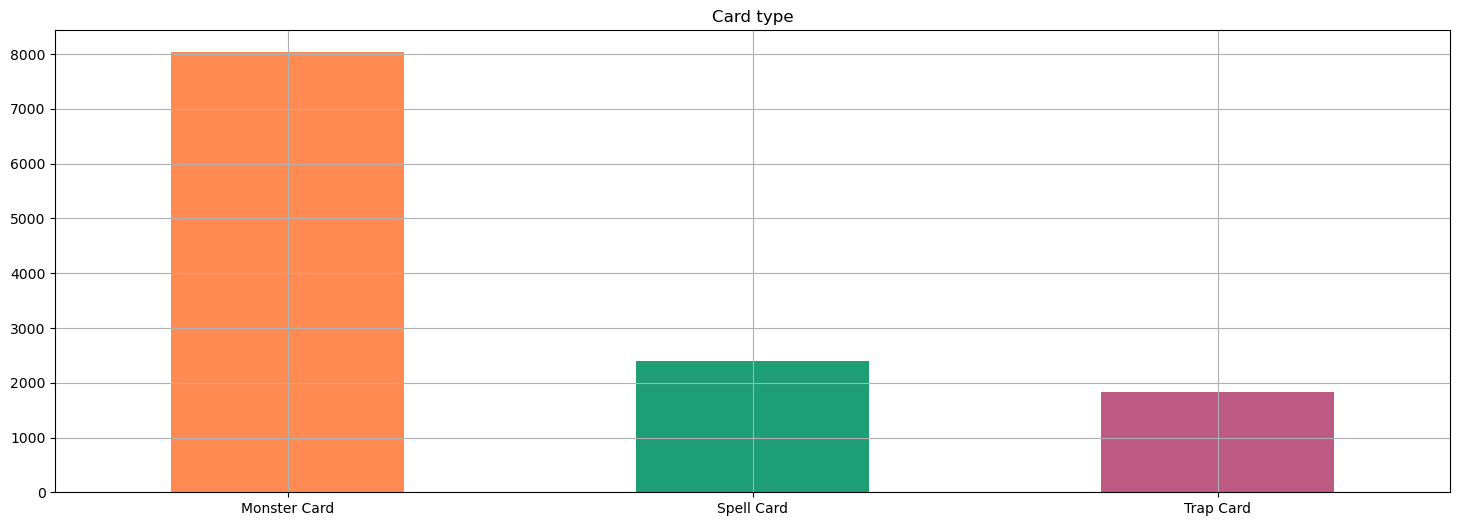

In [12]:
card_type_colors = [colors_dict[i] for i in full_df['Card type'].value_counts().index]
cards_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Monsters

### Attributes

In [13]:
print('Total number of attributes:', monster_df['Attribute'].nunique())

Total number of attributes:

7

In [14]:
monster_df.drop(columns=['Card type', 'Page name', 'Page URL']).groupby('Attribute').nunique()

Name  Password  Archseries  Primary type  Secondary type  \
Attribute                                                             
DARK       2229      2213         457             7               7   
DIVINE        6         0           3             1               0   
EARTH      1880      1873         332             7               6   
FIRE        672       668         188             7               7   
LIGHT      1635      1612         391             7               7   
WATER       838       836         208             7               6   
WIND        766       762         217             7               6   

           Monster type  Effect type  DEF  Pendulum Scale  Link  Link Arrows  \
Attribute                                                                      
DARK                 23          155   63              12     6           42   
DIVINE                2            6    3               0     0            0   
EARTH                23          127   60              12     4           29   
FIRE                 22           85   40               8     4           22   
LIGHT                23          134   50              10     5           30   
WATER                22           93   41               9     4           16   
WIND                 23          105   38              11     4           14   

           ATK  Level/Rank  TCG status  OCG status  Artwork  \
Attribute                                                     
DARK        70          13           6           6        3   
DIVINE       3           2           2           2        1   
EARTH       71          12           5           5        3   
FIRE        43          12           3           5        3   
LIGHT       58          14           5           5        3   
WATER       57          12           4           6        3   
WIND        46          12           6           6        3   

           Modification date  Errata  
Attribute                             
DARK                    2225       4  
DIVINE                     9       3  
EARTH                   1875       4  
FIRE                     670       4  
LIGHT                   1631       4  
WATER                    837       4  
WIND                     763       4

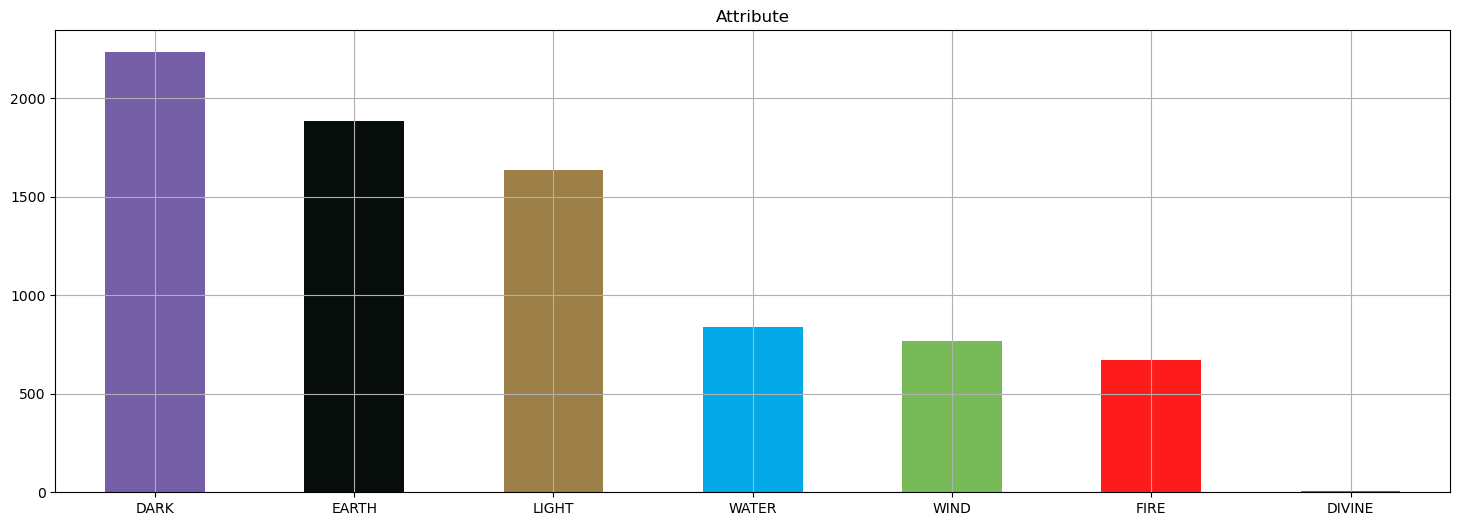

In [15]:
attribute_colors = [colors_dict[i] for i in monster_df['Attribute'].value_counts().index]
monster_df['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

### Primary types

In [16]:
print('Total number of primary types:', monster_df['Primary type'].nunique())

Total number of primary types:

7

In [17]:
monster_df.drop(columns=['Card type', 'Page name', 'Page URL']).groupby('Primary type').nunique()

Name  Password  Archseries  Attribute  Secondary type  \
Primary type                                                             
Effect Monster   5467      5437         782          7               8   
Fusion Monster    436       432         142          6               1   
Link Monster      375       368         139          6               0   
Normal Monster    708       702         110          6               1   
Ritual Monster    126       120          38          6               3   
Synchro Monster   422       417         161          6               1   
Xyz Monster       496       488         194          6               0   

                 Monster type  Effect type  DEF  Pendulum Scale  Link  \
Primary type                                                            
Effect Monster             25          205   66              13     0   
Fusion Monster             23           68   46               4     0   
Link Monster               23           52    0               0     6   
Normal Monster             23            6   48              10     0   
Ritual Monster             15           33   26               1     0   
Synchro Monster            23           57   38               4     0   
Xyz Monster                23           70   42               5     0   

                 Link Arrows  ATK  Level/Rank  TCG status  OCG status  \
Primary type                                                            
Effect Monster             0   73          12           6           6   
Fusion Monster             0   48          12           4           5   
Link Monster              62   39           0           5           6   
Normal Monster             0   58           8           3           4   
Ritual Monster             0   35          12           2           2   
Synchro Monster            0   41          13           5           5   
Xyz Monster                0   51          14           6           5   

                 Artwork  Modification date  Errata  
Primary type                                         
Effect Monster         3               5437       4  
Fusion Monster         3                432       4  
Link Monster           3                374       3  
Normal Monster         3                709       4  
Ritual Monster         1                126       4  
Synchro Monster        2                422       4  
Xyz Monster            2                494       4

#### Has effect discrimination

In [18]:
effect = pd.crosstab(monster_df['Primary type'], pd.isna(monster_df['Effect type']),
rownames=['Primary type'], colnames=['Has effect']).rename(columns={True: 'No Effect', False: 'Effect'})
effect

Has effect       Effect  No Effect
Primary type                      
Effect Monster     5467          0
Fusion Monster      375         61
Link Monster        370          5
Normal Monster       34        675
Ritual Monster      111         15
Synchro Monster     419          3
Xyz Monster         494          2

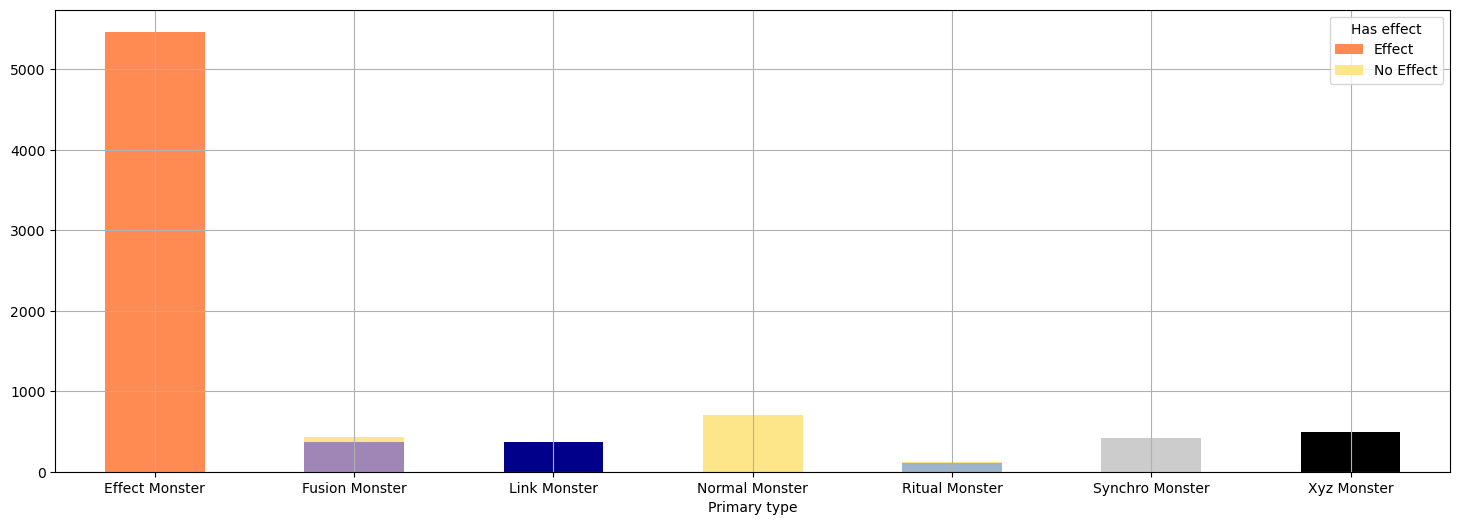

In [19]:
monster_type_colors = {'No Effect': colors_dict['Normal Monster'], 'Effect': [colors_dict[i] for i in effect.index]}
effect.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors)
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [20]:
pendulum = pd.crosstab(monster_df['Primary type'], pd.isna(monster_df['Pendulum Scale']),
rownames=['Primary type'], colnames=['Is Pendulum']).rename(columns={True: 'Not Pendulum', False: 'Pendulum'})
pendulum

Is Pendulum      Pendulum  Not Pendulum
Primary type                           
Effect Monster        268          5199
Fusion Monster         10           426
Link Monster            0           375
Normal Monster         38           671
Ritual Monster          1           125
Synchro Monster         7           415
Xyz Monster             9           487

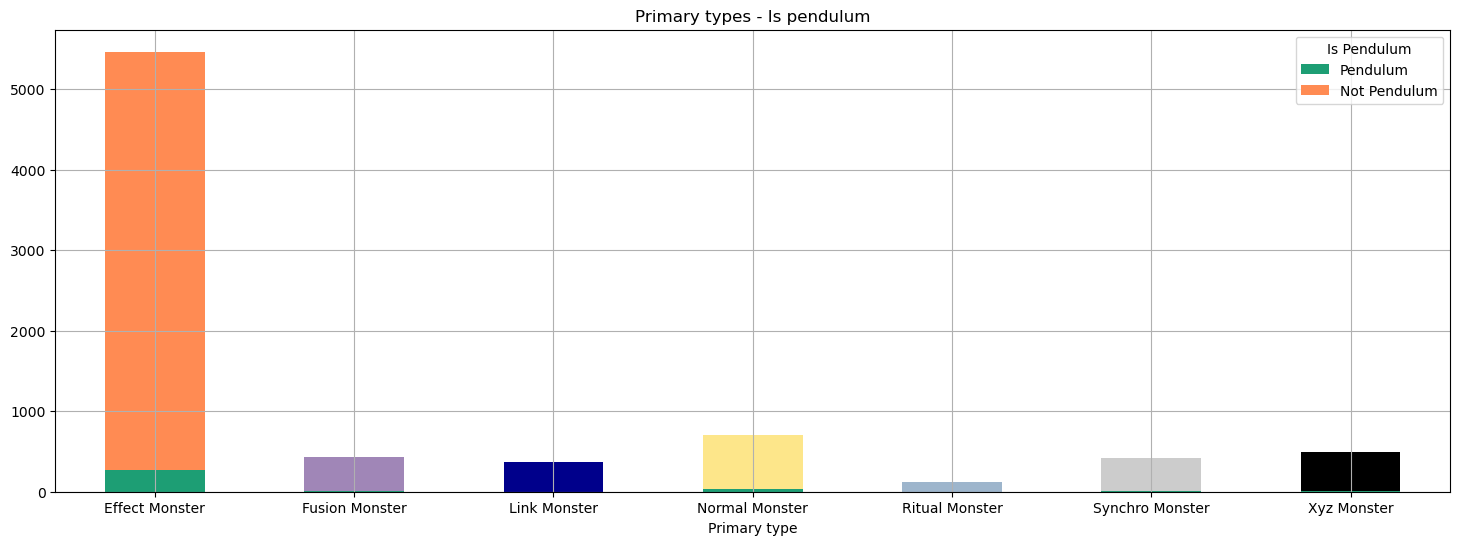

In [21]:
monster_type_colors_b = {'Pendulum': colors_dict['Pendulum Monster'], 'Not Pendulum': [colors_dict[i] for i in pendulum.index]}
pendulum.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = monster_type_colors_b, legend=True, title = 'Primary types - Is pendulum')
plt.show()

#### By attribute

In [22]:
primmary_crosstab = pd.crosstab(cards_df['Primary type'],cards_df['Attribute'])
primmary_crosstab

Attribute        DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Primary type                                                  
Effect Monster   1496       6   1311   459   1108    555   532
Fusion Monster    150       0     83    34     99     35    35
Link Monster      125       0     76    33     87     29    25
Normal Monster    173       0    242    51     73    106    64
Ritual Monster     42       0     17     7     34     20     6
Synchro Monster   111       0     70    50     80     37    74
Xyz Monster       135       0     83    38    154     56    30

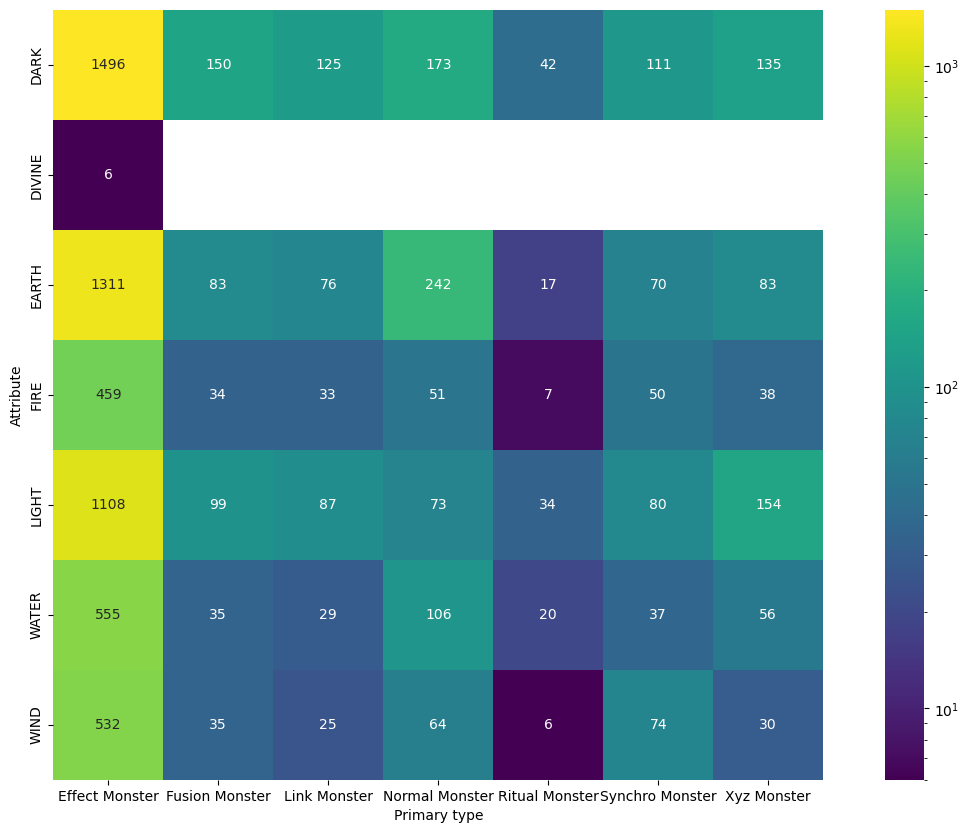

In [23]:
plt.figure(figsize = (16,10))
sns.heatmap(primmary_crosstab.T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Secondary types

In [24]:
exploded_secondary_type = monster_df.explode('Secondary type')
print('Total number of secondary types:', exploded_secondary_type['Secondary type'].nunique())

Total number of secondary types:

6

In [25]:
exploded_secondary_type.drop(columns=['Card type', 'Link', 'Link Arrows', 'Page name', 'Page URL']).groupby('Secondary type').nunique()

Name  Password  Archseries  Attribute  Primary type  \
Secondary type                                                        
Flip monster     186       185          46          6             2   
Gemini monster    45        45          13          6             1   
Spirit monster    39        39           4          6             2   
Toon monster      17        17          13          6             1   
Tuner monster    487       484         138          6             5   
Union monster     37        37           9          6             1   

                Monster type  Effect type  DEF  Pendulum Scale  ATK  \
Secondary type                                                        
Flip monster              19           20   33               1   38   
Gemini monster            18            6   19               0   17   
Spirit monster            13            8   20               2   22   
Toon monster               7            8   15               0   12   
Tuner monster             23           62   32               7   32   
Union monster              9            6   14               0   17   

                Level/Rank  TCG status  OCG status  Artwork  \
Secondary type                                                
Flip monster            12           3           4        1   
Gemini monster           8           1           1        0   
Spirit monster          10           2           2        1   
Toon monster             5           1           2        1   
Tuner monster            9           3           4        3   
Union monster            8           1           1        1   

                Modification date  Errata  
Secondary type                             
Flip monster                  186       4  
Gemini monster                 45       4  
Spirit monster                 39       2  
Toon monster                   17       3  
Tuner monster                 487       4  
Union monster                  37       3

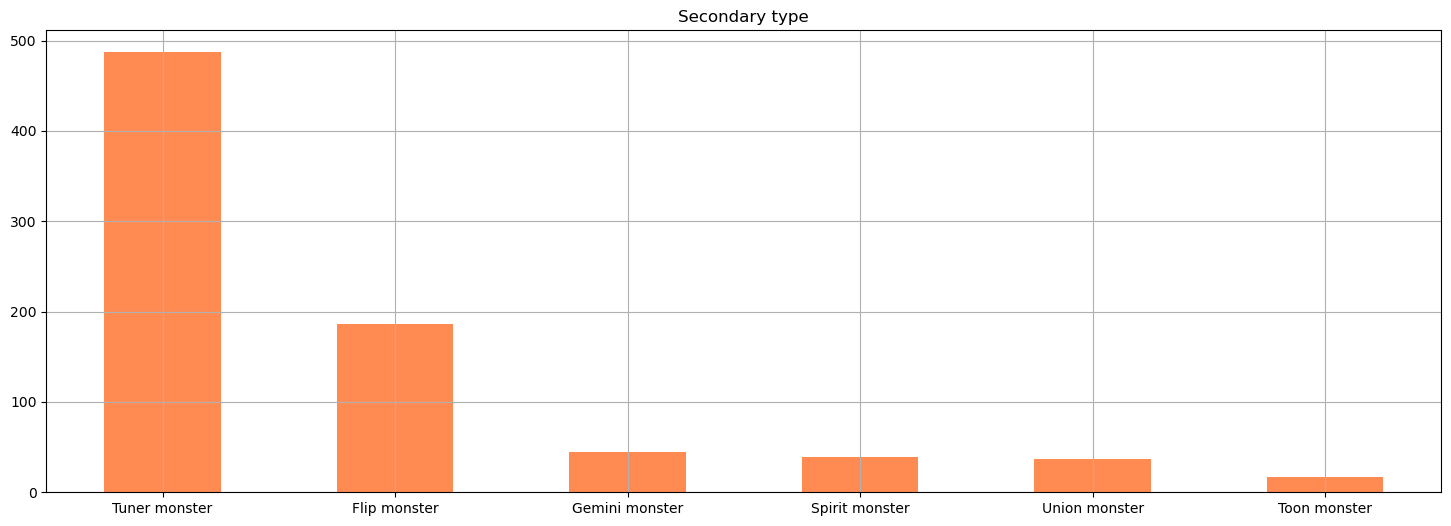

In [26]:
secondary_type_colors = colors_dict['Effect Monster']
exploded_secondary_type['Secondary type'].value_counts().plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = secondary_type_colors, legend=False, title = 'Secondary type')
plt.show()

#### By attribute

In [27]:
secondary_crosstab = pd.crosstab(exploded_secondary_type['Secondary type'],exploded_secondary_type['Attribute'])
secondary_crosstab

Attribute       DARK  EARTH  FIRE  LIGHT  WATER  WIND
Secondary type                                       
Flip monster      51     62    10     33     13    17
Gemini monster    11      8     8      6      8     4
Spirit monster     5      6     6      5      6    11
Toon monster       7      5     1      2      1     1
Tuner monster    126     94    45     99     53    70
Union monster      6      9     3     12      4     3

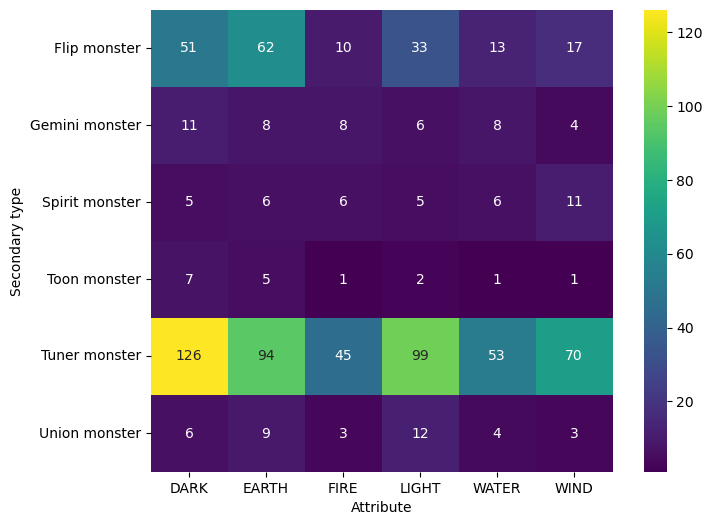

In [28]:
plt.figure(figsize = (8,6))
sns.heatmap(secondary_crosstab[secondary_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True)
plt.show()

#### By secondary type

In [29]:
secondary_crosstab_b = pd.crosstab(exploded_secondary_type['Primary type'],exploded_secondary_type['Secondary type'], margins = True)
secondary_crosstab_b

Secondary type   Flip monster  Gemini monster  Spirit monster  Toon monster  \
Primary type                                                                  
Effect Monster            185              45              37            17   
Fusion Monster              0               0               0             0   
Normal Monster              0               0               0             0   
Ritual Monster              1               0               2             0   
Synchro Monster             0               0               0             0   
All                       186              45              39            17   

Secondary type   Tuner monster  Union monster  All  
Primary type                                        
Effect Monster             440             37  761  
Fusion Monster               3              0    3  
Normal Monster              12              0   12  
Ritual Monster               2              0    5  
Synchro Monster             30              0   30  
All                        487             37  811

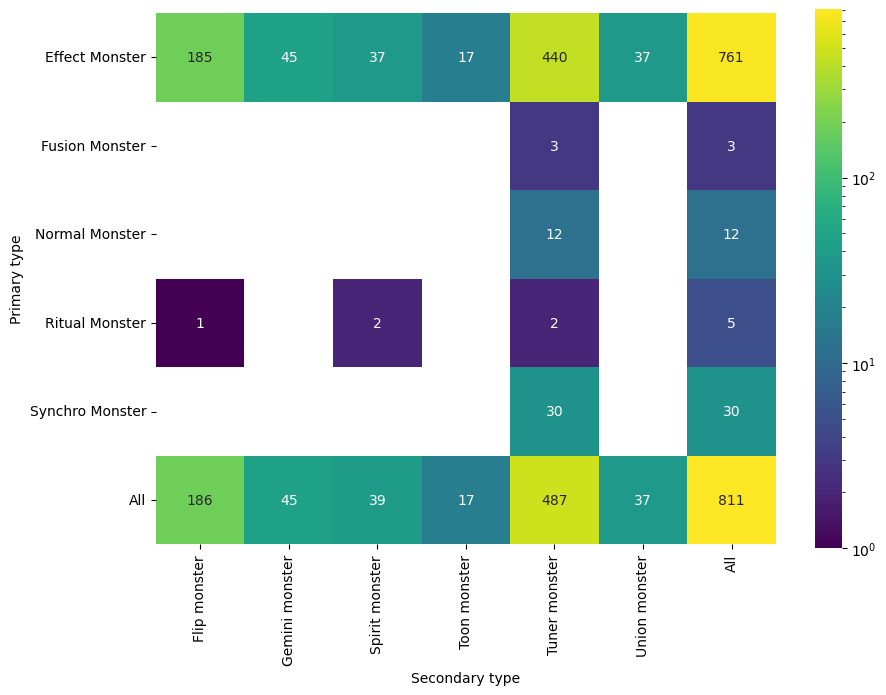

In [30]:
plt.figure(figsize = (10,7))
sns.heatmap(secondary_crosstab_b, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Monster types

In [31]:
print('Total number of monster types:', monster_df['Monster type'].nunique())

Total number of monster types:

25

In [32]:
monster_df.drop(columns=['Card type']).groupby('Monster type').nunique()

Name  Password  Archseries  Attribute  Primary type  \
Monster type                                                         
Aqua            254       254          65          6             7   
Beast           374       371          85          6             7   
Beast-Warrior   242       235          48          6             7   
Creator God       1         0           1          1             1   
Cyberse         255       254          35          6             7   
Dinosaur        126       121          26          6             6   
Divine-Beast      5         0           2          1             1   
Dragon          662       657         186          6             7   
Fairy           516       511         115          6             7   
Fiend           759       757         148          6             7   
Fish            128       128          21          5             7   
Insect          253       252          39          6             7   
Machine         927       921         167          6             7   
Plant           234       233          39          6             6   
Psychic         180       179          43          6             6   
Pyro            122       122          35          5             6   
Reptile         171       171          35          6             6   
Rock            246       245          73          6             7   
Sea Serpent      82        82          28          6             6   
Spellcaster     679       672         150          6             7   
Thunder         129       128          34          6             6   
Warrior        1037      1030         220          6             7   
Winged Beast    314       312          66          6             7   
Wyrm             89        88          20          6             6   
Zombie          241       241          35          6             7   

               Secondary type  Effect type  DEF  Pendulum Scale  Link  \
Monster type                                                            
Aqua                        6           51   33               3     2   
Beast                       4           60   38               7     2   
Beast-Warrior               3           57   31               6     3   
Creator God                 0            1    1               0     0   
Cyberse                     1           45   29               1     6   
Dinosaur                    1           36   32               4     2   
Divine-Beast                0            5    3               0     0   
Dragon                      6          108   48               9     5   
Fairy                       5           83   38               9     4   
Fiend                       6          107   45              12     5   
Fish                        2           31   28               1     1   
Insect                      3           59   33               2     3   
Machine                     7          113   55               9     4   
Plant                       4           38   30               5     4   
Psychic                     2           43   31               5     2   
Pyro                        5           37   30               0     1   
Reptile                     3           46   30               3     2   
Rock                        4           59   40               4     3   
Sea Serpent                 3           32   26               1     2   
Spellcaster                 6          100   42              11     5   
Thunder                     4           38   29               1     2   
Warrior                     6           92   41               6     3   
Winged Beast                5           61   29               4     4   
Wyrm                        1           33   24               3     4   
Zombie                      6           52   37               2     3   

               Link Arrows  ATK  Level/Rank  TCG status  OCG status  \
Monster type                                                          
Aqua      

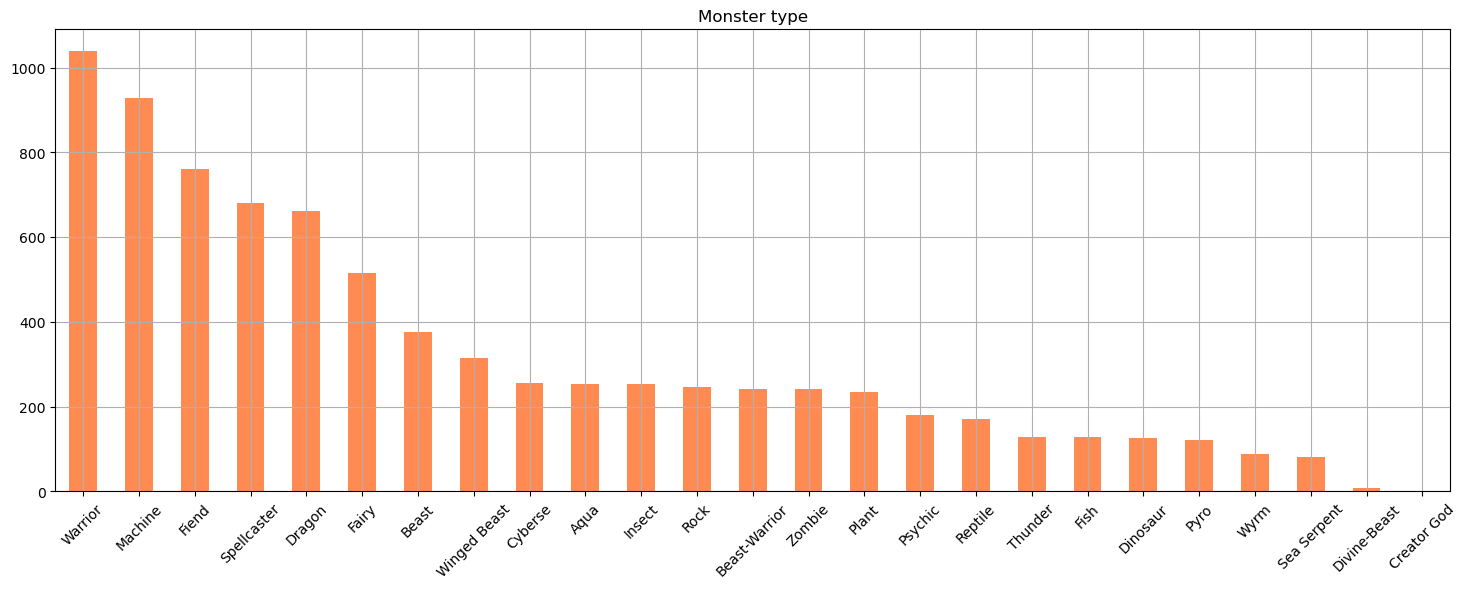

In [33]:
monster_type_colors = colors_dict['Monster Card']
monster_df['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = monster_type_colors, title = 'Monster type')
plt.show()

#### By Attribute

In [34]:
monster_crosstab = pd.crosstab(cards_df['Monster type'],cards_df['Attribute'])
monster_crosstab

Attribute      DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Monster type                                                
Aqua              9       0      6    10      4    219     6
Beast            37       0    210    16     73     14    25
Beast-Warrior    40       0     83    54     34     16    15
Creator God       0       1      0     0      0      0     0
Cyberse          72       0     36    44     62     28    13
Dinosaur         11       0     60    34      5      9     7
Divine-Beast      0       8      0     0      0      0     0
Dragon          256       0     47    48    170     28   113
Fairy            58       0     63    18    325     27    25
Fiend           571       0     34    46     70     24    16
Fish              2       0      2     0      1    121     2
Insect           41       0    135     6     21      4    46
Machine         227       0    316    52    169     48   115
Plant            42       0    122    11     22     24    13
Psychic          23       0     37    17     47     13    43
Pyro              3       0      6   106      4      0     3
Reptile          38       0     34    15     45     35     4
Rock             16       0    199     5     14      5     7
Sea Serpent       3       0      1     1      2     71     4
Spellcaster     280       0     53    28    194     63    62
Thunder          14       0     10     5     77      4    19
Warrior         203       0    364   103    251     53    64
Winged Beast    112       0      7    16     15     12   152
Wyrm             15       0     19    12     23     12     8
Zombie          159       0     38    25      7      8     4

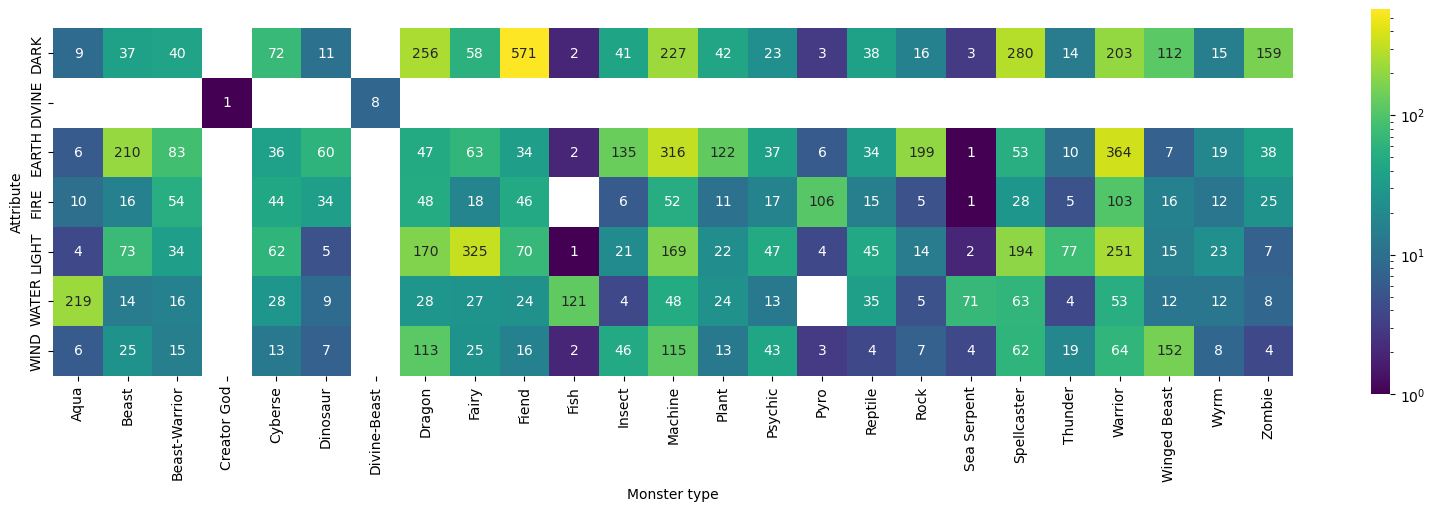

In [35]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab[monster_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

#### By primary type

In [36]:
monster_crosstab_b = pd.crosstab(cards_df['Monster type'],cards_df['Primary type'], dropna=False)
monster_crosstab_b

Primary type   Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Monster type                                                                  
Aqua                      154              11             3              57   
Beast                     273              17             9              50   
Beast-Warrior             165              11             9              21   
Creator God                 1               0             0               0   
Cyberse                   126               5            98               5   
Dinosaur                   89               8             3              17   
Divine-Beast                5               0             0               0   
Dragon                    348              64            33              45   
Fairy                     370              22            25              32   
Fiend                     536              46            28              72   
Fish                       92               5             1              17   
Insect                    186               5            10              29   
Machine                   648              47            39              61   
Plant                     163               6            15              24   
Psychic                   123              11             5               9   
Pyro                       85               8             2              18   
Reptile                   140               2             3              18   
Rock                      169              18             4              27   
Sea Serpent                55               2             2               8   
Spellcaster               513              26            26              54   
Thunder                    98               8             5              10   
Warrior                   681              96            29              78   
Winged Beast              228               9            10              26   
Wyrm                       56               2             9               3   
Zombie                    163               7             7              28   

Primary type   Ritual Monster  Synchro Monster  Xyz Monster  
Monster type                                                 
Aqua                        8                4           17  
Beast                       1               14           11  
Beast-Warrior               5                8           23  
Creator God                 0                0            0  
Cyberse                     7                5            9  
Dinosaur                    0                5            4  
Divine-Beast                0                0            0  
Dragon                     15               96           61  
Fairy                      17               18           32  
Fiend                      15               24           40  
Fish                        1                9            3  
Insect                      1                8           14  
Machine                     4               63           65  
Plant                       0                8           18  
Psychic                     0               19           13  
Pyro                        0                5            4  
Reptile                     0                5            3  
Rock                        7                5           16  
Sea Serpent                 0                5           10  
Spellcaster                18               17           26  
Thunder                     0                6            2  
Warrior                    17               55           82  
Winged Beast                4               15           22  
Wyrm                        0               10            9  
Zombie                      6               18           12

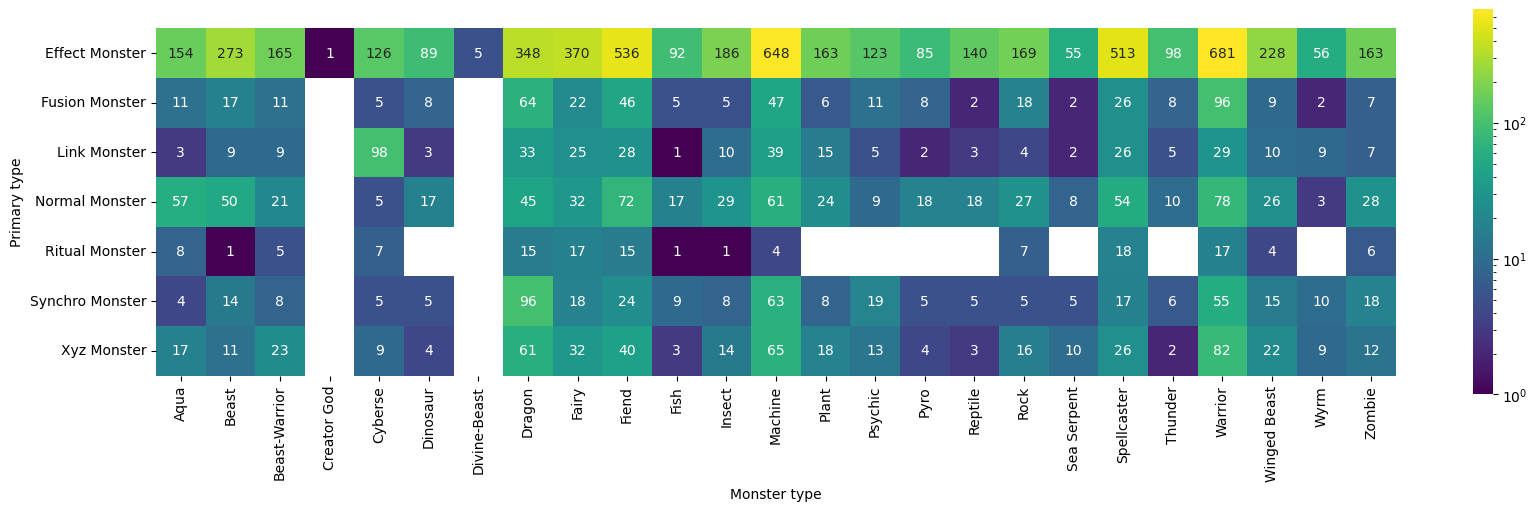

In [37]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_b[monster_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

#### By secondary type

In [38]:
monster_crosstab_c = pd.crosstab(exploded_secondary_type['Monster type'],exploded_secondary_type['Secondary type'], dropna=False)
monster_crosstab_c

Secondary type  Flip monster  Gemini monster  Spirit monster  Toon monster  \
Monster type                                                                 
Aqua                       4               4               1             1   
Beast                     15               1               2             0   
Beast-Warrior              1               0               1             0   
Cyberse                    0               0               0             0   
Dinosaur                   0               0               0             0   
Dragon                     1               6               1             3   
Fairy                      8               2               8             0   
Fiend                     27               4               2             1   
Fish                       0               1               0             0   
Insect                    20               2               0             0   
Machine                   10               1               0             4   
Plant                      4               1               0             0   
Psychic                    3               0               0             0   
Pyro                       4               2               2             0   
Reptile                   18               1               0             0   
Rock                      11               1               2             0   
Sea Serpent                1               1               0             0   
Spellcaster               35               3               4             4   
Thunder                    3               1               1             0   
Warrior                   12               9               6             3   
Winged Beast               5               2               7             1   
Wyrm                       0               0               0             0   
Zombie                     4               3               2             0   

Secondary type  Tuner monster  Union monster  
Monster type                                  
Aqua                       11              3  
Beast                      22              0  
Beast-Warrior               9              0  
Cyberse                     7              0  
Dinosaur                    8              0  
Dragon                     44              4  
Fairy                      22              5  
Fiend                      41              1  
Fish                        8              0  
Insect                     12              0  
Machine                    87             18  
Plant                      20              1  
Psychic                    24              0  
Pyro                        8              1  
Reptile                     7              0  
Rock                        3              0  
Sea Serpent                 9              0  
Spellcaster                41              0  
Thunder                     8              0  
Warrior                    32              3  
Winged Beast               31              0  
Wyrm                       10              0  
Zombie                     23              1

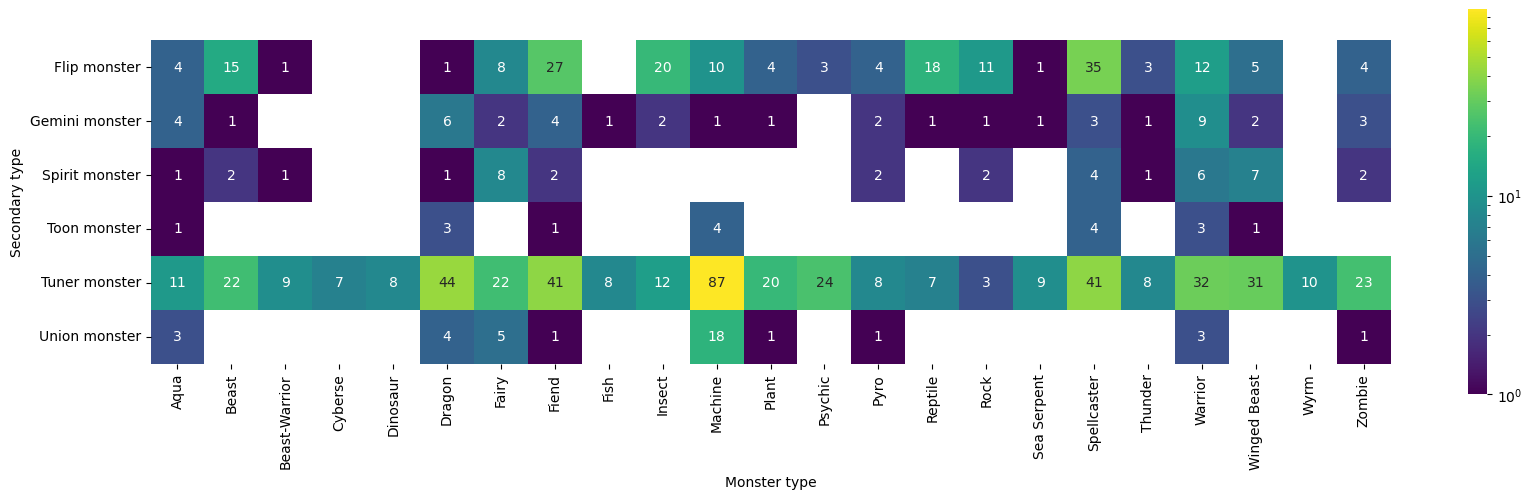

In [39]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_c[monster_crosstab_c>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

### Effect type

In [40]:
print('Total number of effect types:', monster_df['Effect type'].explode().nunique())

Total number of effect types:

14

In [41]:
monster_df[monster_df['Effect type'].notna()].drop(columns=['Card type', 'Page name', 'Page URL']).explode('Effect type').groupby('Effect type').nunique()

Name  Password  Archseries  Attribute  Primary type  \
Effect type                                                                   
Activation condition       1         1           1          1             1   
Condition               3136      3085         651          7             7   
Continuous Effect       2169      2161         560          7             6   
Continuous-like Effect   236       236          72          6             6   
Flip effect              171       170          44          6             1   
Ignition Effect         2631      2617         644          7             6   
Ignition-like Effect     226       220          77          6             6   
Lingering effect          19        19          12          6             3   
Maintenance cost          44        44           8          6             3   
Quick Effect            1042      1033         398          6             6   
Quick-like Effect          4         4           1          1             1   
Summoning condition      933       887         319          7             6   
Trigger Effect          4361      4340         775          7             7   
Unclassified effect      822       815         277          7             6   

                        Secondary type  Monster type  DEF  Pendulum Scale  \
Effect type                                                                 
Activation condition                 0             1    1               1   
Condition                            7            25   64              13   
Continuous Effect                    5            24   52              12   
Continuous-like Effect               4            21   36              13   
Flip effect                          2            19   33               1   
Ignition Effect                      7            24   61              12   
Ignition-like Effect                 3            20   33              13   
Lingering effect                     2            14   13               0   
Maintenance cost                     0            12   18               2   
Quick Effect                         5            23   49               9   
Quick-like Effect                    0             1    2               0   
Summoning condition                  4            25   52               9   
Trigger Effect                       7            24   63              13   
Unclassified effect                  5            25   45               9   

                        Link  Link Arrows  ATK  Level/Rank  TCG status  \
Effect type                                                              
Activation condition       0            0    1           1           1   
Condition                  6           54   63          14           5   
Continuous Effect          6           48   59          14           5   
Continuous-like Effect     1            2   42          11           3   
Flip effect                0            0   38          12           3   
Ignition Effect            5           42   66          13           5   
Ignition-like Effect       1            1   35          12           3   
Lingering effect           2            2   13           8           2   
Maintenance cost           1            1   21           8           1   
Quick Effect               6           29   50          13           4   
Quick-like Effect          0            0    3           1           1   
Summoning condition        5            7   52          13           5   
Trigger Effect             6           51   66          14           5   
Unclassified effect        5           12   49          13           4   

                        OCG status  Artwork  Modification date  Errata  
Effect type                                                             
Activation condition             1        0                  1       1  
Condition                        6        3               3115       4  
Continuous Effect                5        3      

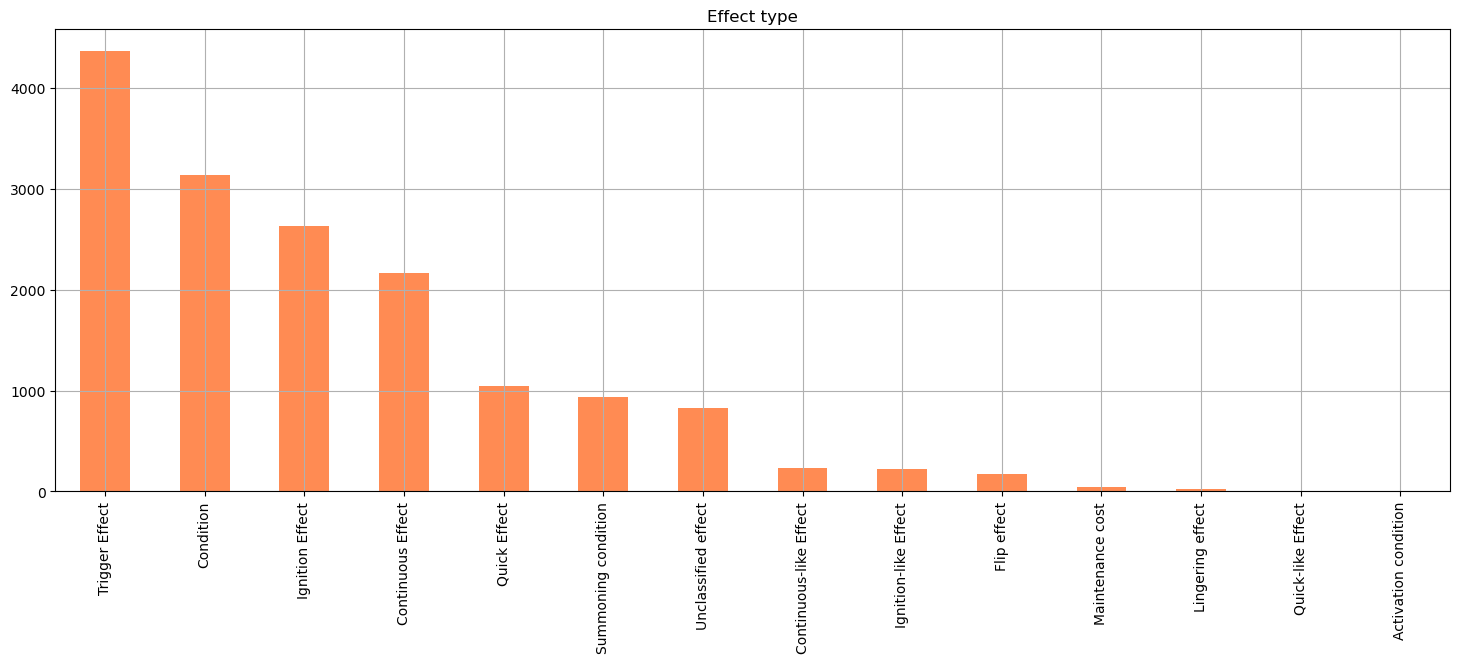

In [42]:
monster_effect_colors = colors_dict['Effect Monster']
monster_df['Effect type'].explode('Effect type').value_counts().plot.bar(figsize = (18,6), grid = True, color = monster_effect_colors, title='Effect type')
# plt.yscale('log')
plt.show()

### ATK

In [43]:
print('Total number of ATK values:', monster_df['ATK'].nunique())

Total number of ATK values:

82

In [44]:
monster_df.drop(columns=['Card type', 'Page name', 'Page URL']).groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
ATK                                                                         
0      602       600         228          6             7               7   
50       2         2           2          2             1               0   
100    219       219         107          6             5               3   
150      1         1           0          1             1               0   
200    122       122          69          6             6               5   
...    ...       ...         ...        ...           ...             ...   
4500    12        12           9          3             3               0   
4600     2         2           1          2             1               0   
5000     9         9           6          3             5               0   
?       79        75          36          7             5               1   
X000     1         0           1          1             0               0   

      Monster type  Effect type  DEF  Pendulum Scale  Link  Link Arrows  \
ATK                                                                       
0               23           94   35               9     5           15   
50               2            2    2               0     0            0   
100             20           48   27               8     2            2   
150              1            0    1               0     0            0   
200             20           36   22               5     1            2   
...            ...          ...  ...             ...   ...          ...   
4500             6           10    4               0     0            0   
4600             1            2    1               0     0            0   
5000             4            8    4               0     1            1   
?               20           34    8               2     1            1   
X000             1            0    1               0     0            0   

      Level/Rank  TCG status  OCG status  Artwork  Modification date  Errata  
ATK                                                                           
0             13           6           5        3                601       4  
50             1           1           1        0                  2       0  
100           11           3           2        2                219       4  
150            1           1           1        0                  1       0  
200            7           2           3        1                122       4  
...          ...         ...         ...      ...                ...     ...  
4500           4           1           1        1                 12       3  
4600           1           1           1        1                  2       1  
5000           2           1           1        1                  9       2  
?             13           3           3        3                 80       4  
X000           1           1           1        0                  1       1  

[82 rows x 18 columns]

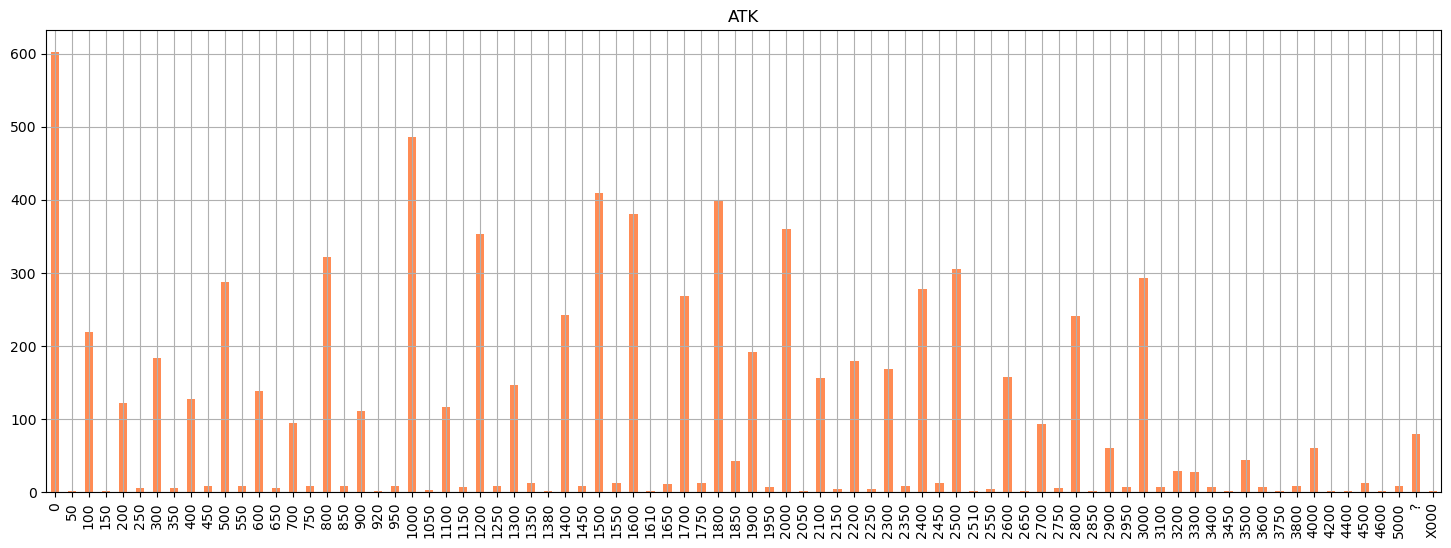

In [45]:
atk_colors = colors_dict['Monster Card']
monster_df['ATK'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = atk_colors, title = 'ATK')
plt.show()

### DEF

In [46]:
print('Total number of DEF values:', monster_df['DEF'].nunique())

Total number of DEF values:

77

In [47]:
monster_df.drop(columns=['Card type', 'Page name', 'Page URL']).groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
DEF                                                                         
0      755       754         253          6             6               8   
50       1         1           1          1             1               0   
100    211       211          95          6             5               4   
200    252       251         109          6             5               5   
250      8         8           3          4             2               1   
...    ...       ...         ...        ...           ...             ...   
4500     2         2           1          2             2               0   
4800     1         1           1          1             1               0   
5000     5         5           3          3             2               0   
?       53        49          25          7             4               1   
X000     1         0           1          1             0               0   

      Monster type  Effect type  Pendulum Scale  Link  Link Arrows  ATK  \
DEF                                                                       
0               23          104              10     0            0   45   
50               1            1               0     0            0    1   
100             19           47               8     0            0   24   
200             23           48               5     0            0   31   
250              5            5               0     0            0    4   
...            ...          ...             ...   ...          ...  ...   
4500             2            2               0     0            0    1   
4800             1            1               0     0            0    1   
5000             3            4               0     0            0    2   
?               17           25               1     0            0    2   
X000             1            0               0     0            0    1   

      Level/Rank  TCG status  OCG status  Artwork  Modification date  Errata  
DEF                                                                           
0             13           4           4        2                751       4  
50             1           1           1        0                  1       0  
100           10           2           3        2                210       4  
200           10           2           4        2                252       4  
250            2           1           1        0                  8       2  
...          ...         ...         ...      ...                ...     ...  
4500           1           1           1        0                  2       0  
4800           1           1           1        0                  1       0  
5000           2           1           1        1                  5       2  
?             13           3           3        2                 54       4  
X000           1           1           1        0                  1       1  

[77 rows x 18 columns]

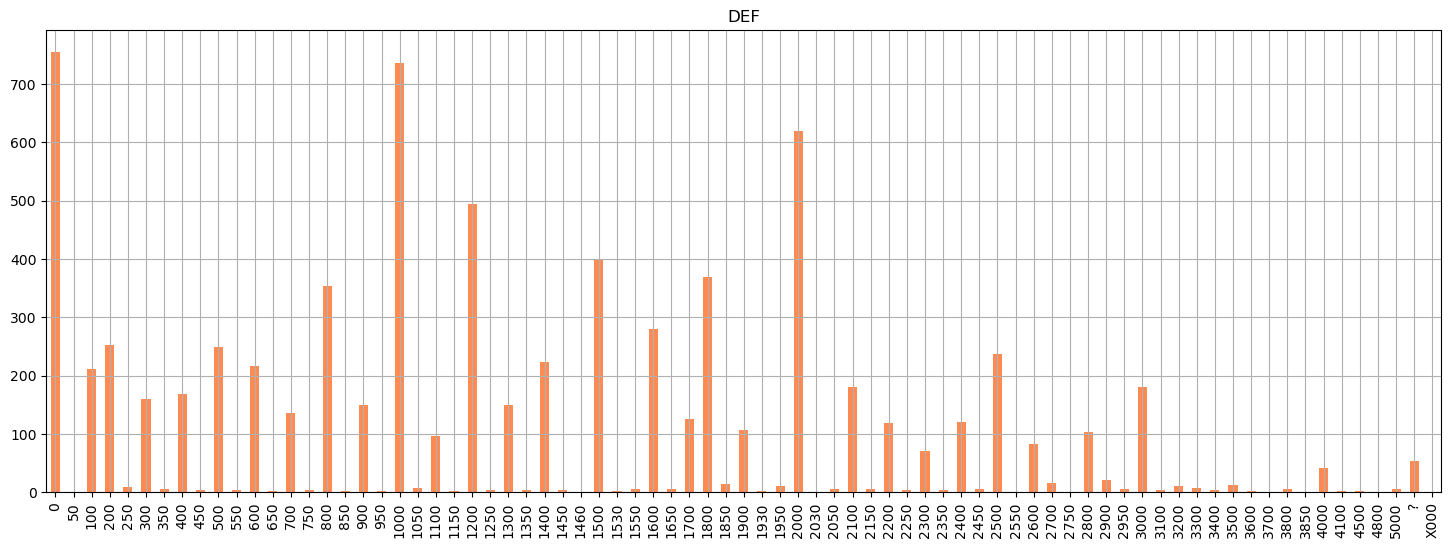

In [48]:
def_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'DEF')
plt.show()

### Level/Rank

In [49]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows', 'Page name', 'Page URL']).groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  \
Level/Rank                                                        
0              6         6           3          2             2   
1            611       610         223          6             6   
2            676       674         213          6             6   
3           1150      1146         294          6             6   
4           2350      2349         514          6             6   
5            602       600         242          6             6   
6            614       608         237          6             6   
7            469       465         226          6             6   
8            683       668         301          6             6   
9            147       144          85          6             5   
10           252       241         150          7             5   
11            31        31          23          6             5   
12            59        53          41          7             5   
13             1         1           1          1             1   

            Secondary type  Monster type  Effect type  DEF  Pendulum Scale  \
Level/Rank                                                                   
0                        0             2            5    3               0   
1                        7            23           81   30              10   
2                        6            23           76   30               7   
3                        6            23           96   36               9   
4                        6            23          135   47               9   
5                        6            23           84   39               8   
6                        6            23           92   38               9   
7                        6            23          101   35               9   
8                        5            23          110   41               8   
9                        2            21           56   27               1   
10                       2            22           77   33               6   
11                       3            13           22   16               1   
12                       1            13           33   18               3   
13                       0             1            1    1               0   

            ATK  TCG status  OCG status  Artwork  Modification date  Errata  
Level/Rank                                                                   
0             3           2           2        0                  6       1  
1            22           4           4        2                609       4  
2            29           3           6        1                673       4  
3            41           3           6        3               1150       4  
4            54           4           6        3               2343       4  
5            46           3           4        2                602       4  
6            38           5           6        3                615       4  
7            38           5           4        2                471       4  
8            42           5           5        3                684       4  
9            31           4           3        1                147       4  
10           32           4           3        3                255       4  
11           15           3           1        1                 31       2  
12           13           1           3        1                 59       3  
13            1           1           1        0                  1       0

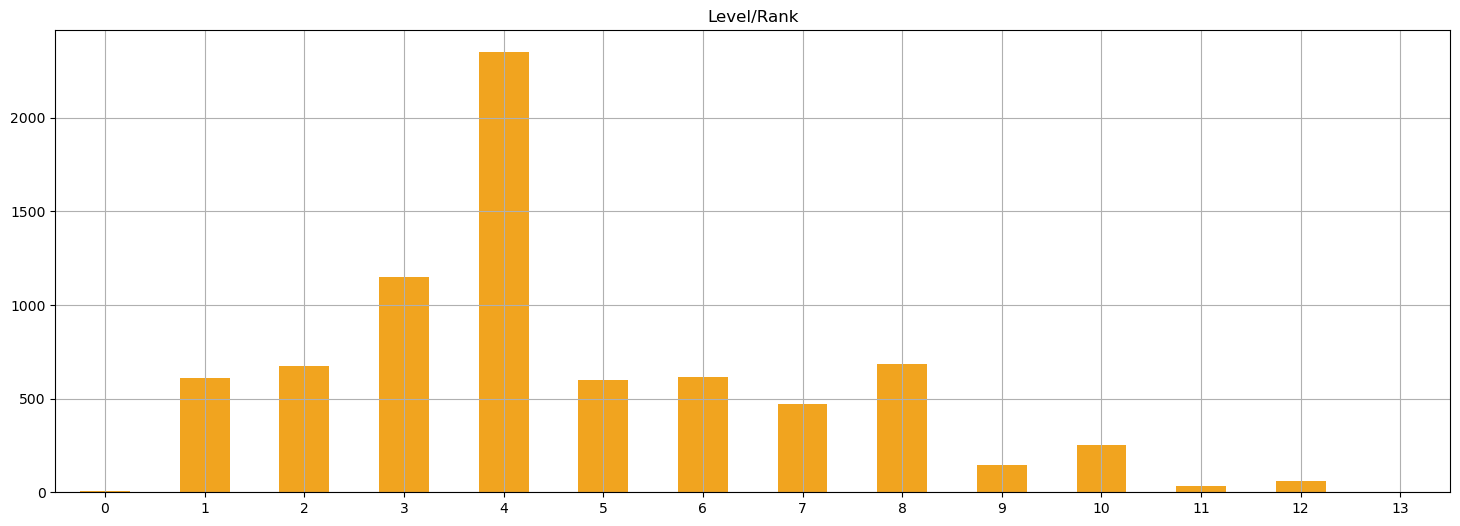

In [50]:
stars_colors = colors_dict['Level']
monster_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color= stars_colors, title = 'Level/Rank')
plt.show()

#### ATK statistics

In [51]:
monster_df[['Level/Rank','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            602.0   243.770764   353.151112  0.0     0.0   100.0   300.0   
2            674.0   582.121662   407.875782  0.0   300.0   500.0   800.0   
3           1147.0   957.672188   485.624483  0.0   600.0  1000.0  1300.0   
4           2338.0  1417.976903   541.688248  0.0  1200.0  1500.0  1800.0   
5            599.0  1760.550918   643.239500  0.0  1500.0  1900.0  2200.0   
6            611.0  2016.939444   611.451078  0.0  1900.0  2200.0  2400.0   
7            466.0  2285.300429   619.619738  0.0  2200.0  2500.0  2600.0   
8            675.0  2547.185185   704.489263  0.0  2500.0  2800.0  3000.0   
9            144.0  2605.208333   831.203499  0.0  2500.0  2800.0  3000.0   
10           232.0  2817.456897  1216.555708  0.0  2800.0  3000.0  3500.0   
11            31.0  2990.322581  1074.741779  0.0  3000.0  3300.0  3500.0   
12            55.0  3281.818182  1391.786876  0.0  3000.0  3800.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          4000.0  
12          5000.0

#### DEF statistics

In [52]:
monster_df[['Level/Rank','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            604.0   350.331126   528.405301  0.0     0.0   100.0   400.0   
2            675.0   668.666667   558.731342  0.0   200.0   500.0   900.0   
3           1147.0   956.974717   573.242973  0.0   600.0   900.0  1300.0   
4           2340.0  1169.243590   608.859123  0.0   800.0  1200.0  1600.0   
5            600.0  1425.750000   674.116577  0.0  1000.0  1500.0  1900.0   
6            611.0  1553.486088   711.561979  0.0  1200.0  1700.0  2000.0   
7            468.0  1889.957265   653.057050  0.0  1600.0  2000.0  2312.5   
8            682.0  1985.043988   846.151735  0.0  1600.0  2100.0  2500.0   
9            144.0  2312.152778   787.805808  0.0  2000.0  2500.0  2900.0   
10           241.0  2232.572614  1274.618905  0.0  1900.0  2500.0  3000.0   
11            31.0  2672.580645  1151.364315  0.0  2250.0  3000.0  3400.0   
12            56.0  2805.357143  1614.301948  0.0  2000.0  3000.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          4000.0  
12          5000.0

### Pendulum scale

In [53]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows', 'Page name', 'Page URL']).groupby('Pendulum Scale').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Primary type  \
Pendulum Scale                                                        
0                 11        11           8          5             2   
1                 70        67          39          6             5   
2                 36        36          15          6             2   
3                 37        37          17          6             3   
4                 33        33          17          5             5   
5                 34        34          16          6             2   
6                 15        15           9          4             1   
7                 27        27          16          6             2   
8                 43        43          23          6             5   
9                  8         8           3          3             2   
10                15        12           8          6             5   
12                 3         3           3          2             2   
13                 1         1           1          1             1   

                Secondary type  Monster type  Effect type  DEF  ATK  \
Pendulum Scale                                                        
0                            1             8            9    6    6   
1                            2            10           38   27   28   
2                            1            11           21   22   17   
3                            1            16           24   15   23   
4                            0             8           25   16   18   
5                            1            12           20   21   23   
6                            1             7           11   11   11   
7                            1            14           14   17   19   
8                            1             9           24   18   19   
9                            1             3            5    2    3   
10                           0             6           11    8    6   
12                           0             3            3    3    3   
13                           0             1            1    1    1   

                Level/Rank  TCG status  OCG status  Artwork  \
Pendulum Scale                                                
0                        6           1           1        1   
1                       11           3           4        1   
2                        6           2           2        1   
3                        8           1           1        0   
4                        8           1           1        2   
5                        7           3           3        0   
6                        6           1           1        0   
7                        6           1           1        1   
8                        8           2           2        0   
9                        5           1           1        0   
10                       6           2           2        0   
12                       2           1           1        0   
13                       1           1           1        0   

                Modification date  Errata  
Pendulum Scale                             
0                              11       1  
1                              70       3  
2                              36       3  
3                              37       1  
4                              33       2  
5                              34       2  
6                              15       1  
7                              27       3  
8                              43       2  
9                               8       0  
10                             15       0  
12                              3       0  
13                              1       0

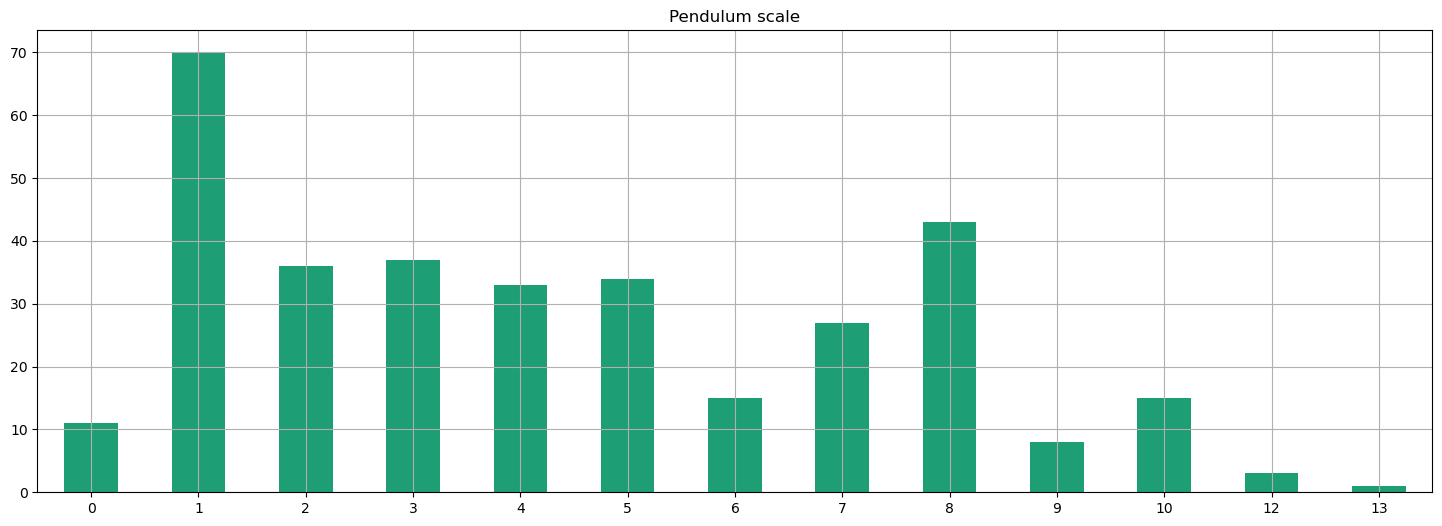

In [54]:
scales_colors = colors_dict['Pendulum Monster']
monster_df['Pendulum Scale'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = scales_colors, title = 'Pendulum scale')
plt.show()

#### ATK statistics

In [55]:
monster_df[['Pendulum Scale','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1281.818182  1300.629218     0.0     0.0  1100.0   
1               69.0  1740.579710  1034.737654     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               37.0  1463.513514   848.417534     0.0   600.0  1750.0   
4               33.0  1824.242424  1017.972956     0.0  1200.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               43.0  1211.627907   946.222893     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2100.0  2600.0  
4               2700.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               1900.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### DEF statistics

In [56]:
monster_df[['Pendulum Scale','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1154.545455  1217.672892     0.0     0.0   700.0   
1               70.0  1632.857143   968.447350     0.0  1000.0  1800.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               37.0  1144.594595   787.910720     0.0   500.0  1200.0   
4               33.0  1563.636364   834.347867     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               43.0  1048.837209   761.693631     0.0   400.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2300.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1600.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### Level/Rank statistics

In [57]:
monster_df[['Pendulum Scale','Level/Rank']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    11.0  5.636364  3.529100  1.0  2.00   7.0   8.00  10.0
1                    70.0  6.042857  2.410338  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    37.0  4.432432  1.708484  1.0  4.00   4.0   5.00  10.0
4                    33.0  5.606061  2.135114  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    43.0  3.860465  2.284330  1.0  2.00   4.0   5.00  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    1.0  7.000000       NaN  7.0  7.00   7.0   7.00   7.0

### Link

In [58]:
monster_df.drop(columns=['Card type', 'Primary type', 'Secondary type','Level/Rank','DEF','Pendulum Scale', 'Page name', 'Page URL']).groupby('Link').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link                                                                     
1       49        48          27          6            11           17   
2      187       187         103          6            23           32   
3       84        84          48          6            16           25   
4       44        41          24          6            16           21   
5        9         6           5          2             5            6   
6        2         2           2          1             1            2   

      Link Arrows  ATK  TCG status  OCG status  Artwork  Modification date  \
Link                                                                         
1               8   10           3           5        1                 49   
2              19   24           2           4        3                186   
3              17   18           3           2        2                 84   
4              13   12           3           4        3                 44   
5               3    4           3           2        0                  9   
6               2    2           1           1        0                  2   

      Errata  
Link          
1          1  
2          3  
3          2  
4          1  
5          0  
6          0

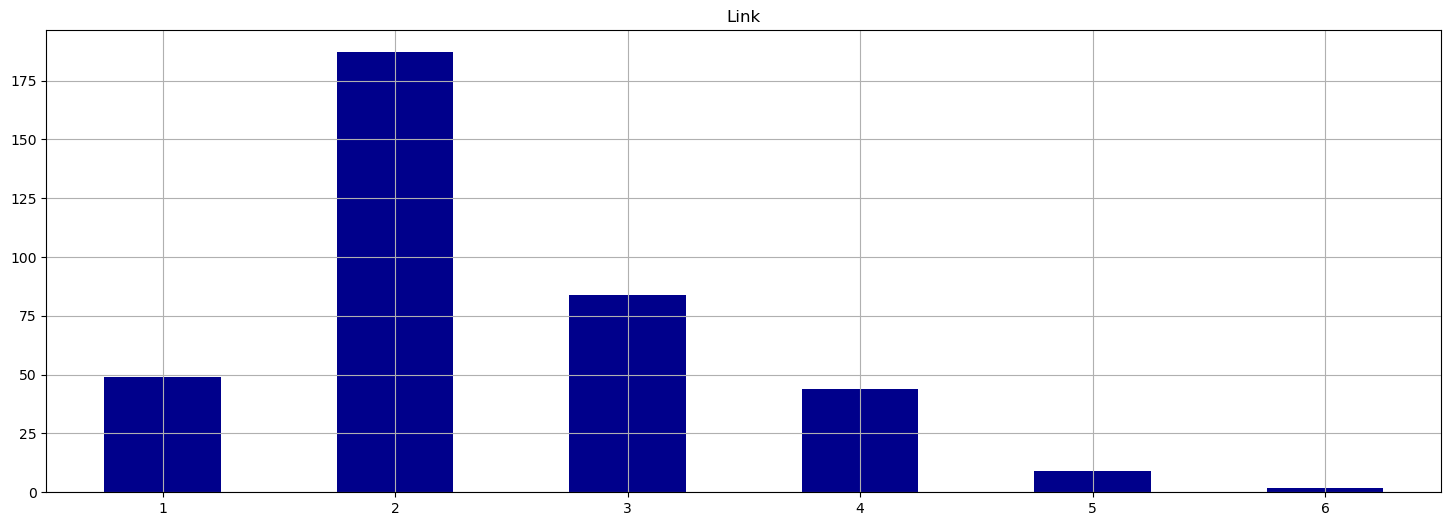

In [59]:
link_colors = colors_dict['Link Monster']
monster_df['Link'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = link_colors, title='Link')
plt.show()

#### ATK statistics

In [60]:
monster_df[['Link','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Link').describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      49.0   728.571429   476.969601     0.0   300.0   800.0  1000.0  1500.0
2     187.0  1410.427807   511.676381     0.0  1100.0  1500.0  1800.0  2300.0
3      84.0  2258.928571   651.234264     0.0  2200.0  2400.0  2500.0  4000.0
4      43.0  2660.465116   653.976676     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [61]:
print('Total number of link arrow combinations:', monster_df['Link Arrows'].nunique())

Total number of link arrow combinations:

62

In [62]:
monster_df.drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Link', 'Secondary type', 'DEF', 'Page name', 'Page URL']).groupby('Link Arrows').nunique()

Name  Password  Archseries  Attribute  Monster type  \
Link Arrows                                                         
(←,)             5         5           4          2             3   
(←, ↑)           4         4           2          2             3   
(←, →)          18        18           9          6             8   
(←, →, ↑)        8         8           5          4             5   
(↑,)            10        10           5          5             5   
...            ...       ...         ...        ...           ...   
(↙, ↘, ←, ↖)     1         1           1          1             1   
(↙, ↘, ↑)       22        22          15          6            11   
(↙, ↘, →)        2         2           2          2             2   
(↙, ↘, ↖)        2         2           0          2             2   
(↙, ↘, ↖, ↗)     1         1           1          1             1   

              Effect type  ATK  TCG status  OCG status  Artwork  \
Link Arrows                                                       
(←,)                    4    2           3           2        0   
(←, ↑)                  3    4           1           1        0   
(←, →)                  8   11           2           2        1   
(←, →, ↑)               7    6           1           1        0   
(↑,)                    9    6           1           1        0   
...                   ...  ...         ...         ...      ...   
(↙, ↘, ←, ↖)            1    1           1           1        0   
(↙, ↘, ↑)              11   11           2           2        2   
(↙, ↘, →)               2    2           1           1        0   
(↙, ↘, ↖)               2    2           1           1        0   
(↙, ↘, ↖, ↗)            1    1           1           1        0   

              Modification date  Errata  
Link Arrows                              
(←,)                          5       0  
(←, ↑)                        4       0  
(←, →)                       18       0  
(←, →, ↑)                     8       0  
(↑,)                         10       0  
...                         ...     ...  
(↙, ↘, ←, ↖)                  1       0  
(↙, ↘, ↑)                    22       2  
(↙, ↘, →)                     2       0  
(↙, ↘, ↖)                     2       0  
(↙, ↘, ↖, ↗)                  1       1  

[62 rows x 12 columns]

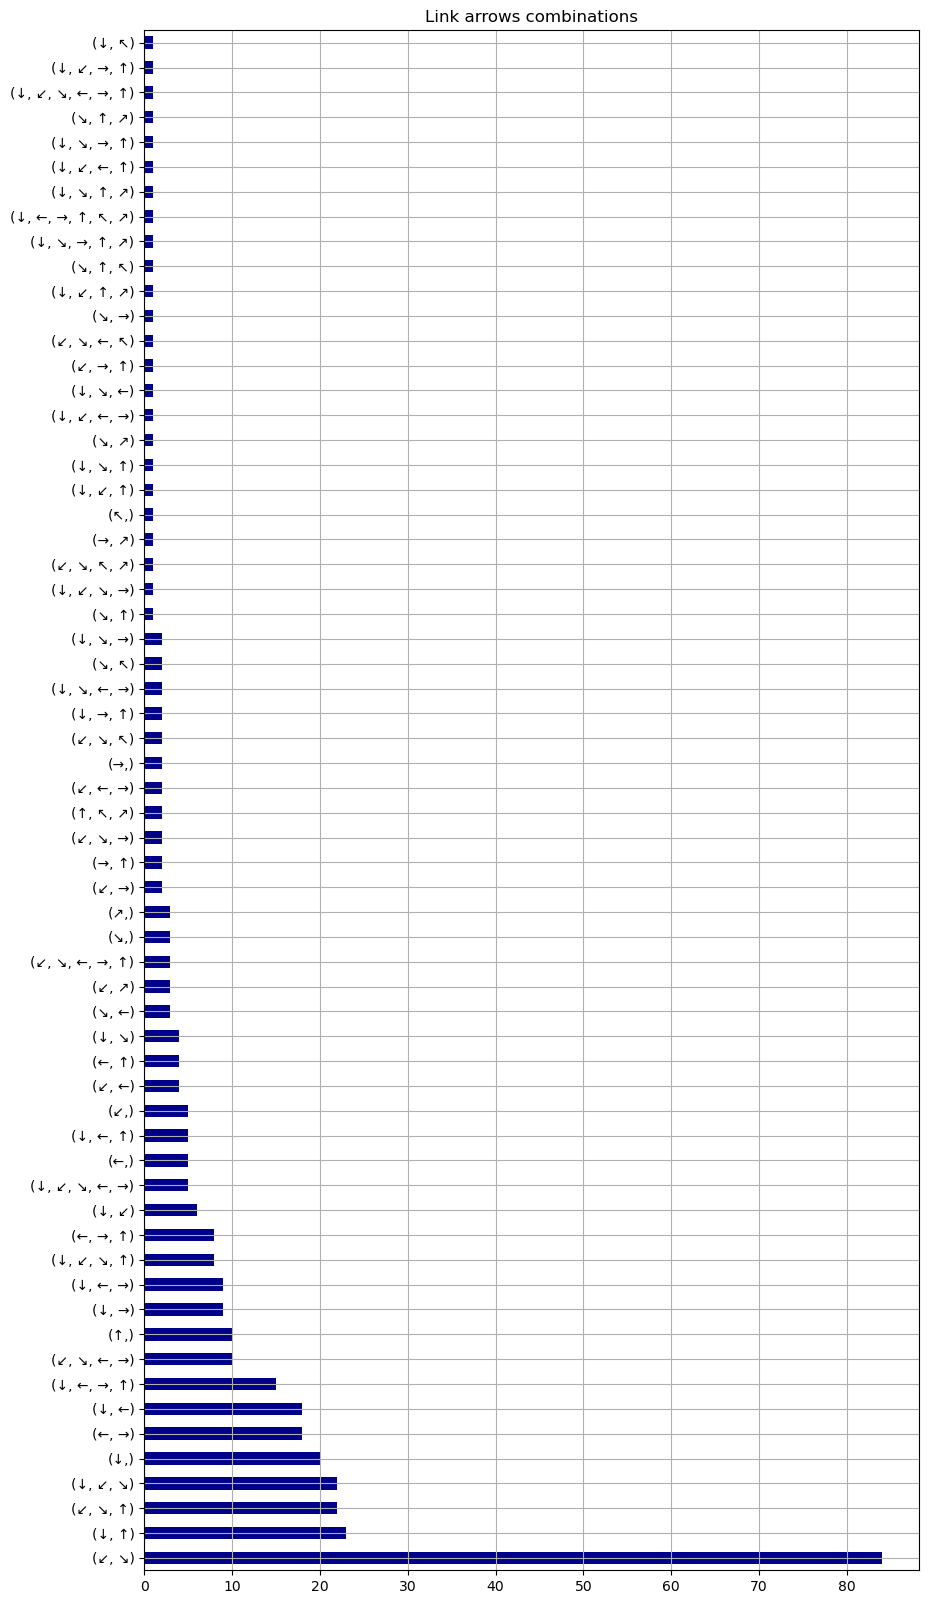

In [63]:
arrows_colors = colors_dict['Link Monster']
monster_df['Link Arrows'].value_counts().plot.barh(figsize = (10,20), grid = True, color = arrows_colors, title = 'Link arrows combinations')
plt.show()

#### By unique

In [64]:
monster_df[monster_df['Link Arrows'].notna()].drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Secondary type', 'DEF', 'Page name', 'Page URL']).explode('Link Arrows').groupby('Link Arrows').nunique()

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link Arrows                                                                     
←             117       111          46          6            21           35   
↑             118       115          45          6            20           31   
→             103        97          40          6            19           30   
↓             164       157          71          6            20           41   
↖              12        12           6          5             5            7   
↗              16        16           8          5             7            7   
↘             188       185         103          6            22           36   
↙             190       187         104          6            22           37   

             Link  ATK  TCG status  OCG status  Artwork  Modification date  \
Link Arrows                                                                  
←               6   29           5           3        3                117   
↑               6   27           4           4        3                118   
→               6   27           4           3        2                103   
↓               6   32           4           5        3                164   
↖               5   10           1           2        2                 12   
↗               6   11           1           2        2                 16   
↘               6   33           4           4        3                188   
↙               6   34           4           5        3                190   

             Errata  
Link Arrows          
←                 1  
↑                 2  
→                 1  
↓                 1  
↖                 1  
↗                 1  
↘                 3  
↙                 3

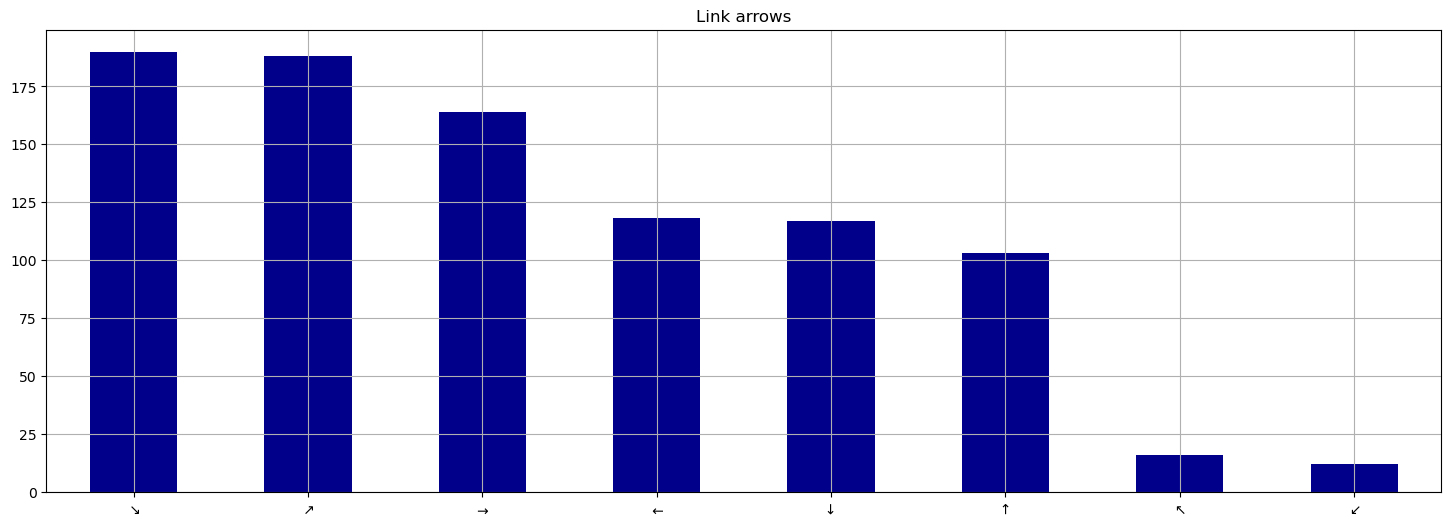

In [65]:
arrows_colors_b = colors_dict['Link Monster']
monster_df['Link Arrows'].explode('Link Arrows').value_counts().plot.bar(figsize = (18,6), grid = True, color = arrows_colors_b, title = 'Link arrows')
plt.show()

#### By link

In [66]:
arrow_per_link = monster_df[['Link Arrows','Link']].explode('Link Arrows').dropna()
arrow_crosstab = pd.crosstab(arrow_per_link['Link Arrows'],arrow_per_link['Link'])
arrow_crosstab

Link          1   2   3   4  5  6
Link Arrows                      
←             5  47  25  30  8  2
↑            10  30  44  28  4  2
→             2  33  26  31  9  2
↓            20  61  43  32  6  2
↖             1   3   5   2  0  1
↗             3   5   3   3  1  1
↘             3  96  54  25  9  1
↙             5  99  52  25  8  1

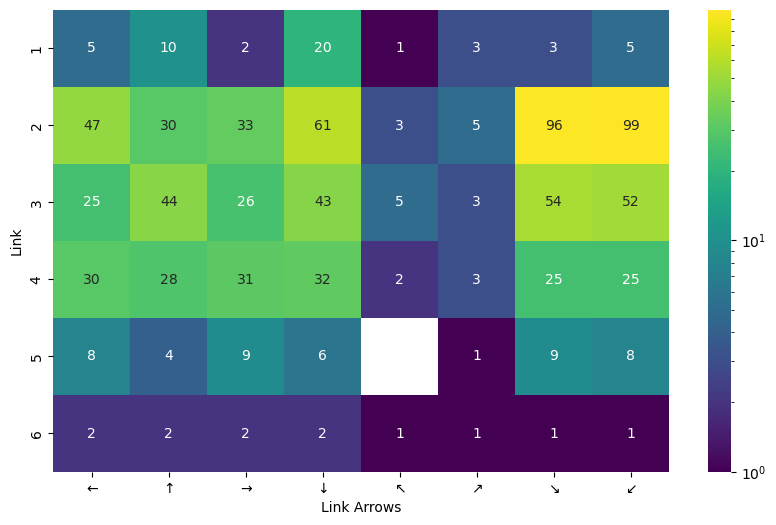

In [67]:
plt.figure(figsize = (10,6))
sns.heatmap(arrow_crosstab[arrow_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

## Spell & Trap

### Properties

In [68]:
print('Total number of properties:', st_df['Property'].nunique())

Total number of properties:

9

In [69]:
st_df.drop(columns=['Card type', 'Page name', 'Page URL']).groupby('Property').nunique()

Name  Password  Archseries  Effect type  TCG status  \
Property                                                                     
Continuous Spell Card   423       421         162           55           6   
Continuous Trap Card    495       486         163           64           3   
Counter Trap Card       158       155          60           19           2   
Equip Spell Card        264       264          75           37           3   
Field Spell Card        278       273         145           35           5   
Normal Spell Card       925       922         232           43           5   
Normal Trap Card       1174      1171         241           48           6   
Quick-Play Spell Card   434       431         140           35           3   
Ritual Spell Card        77        75          26            8           1   

                       OCG status  Artwork  Modification date  Errata  
Property                                                               
Continuous Spell Card           4        2                419       4  
Continuous Trap Card            3        1                494       4  
Counter Trap Card               3        1                158       3  
Equip Spell Card                2        1                264       4  
Field Spell Card                5        1                279       4  
Normal Spell Card               6        3                924       4  
Normal Trap Card                5        2               1170       3  
Quick-Play Spell Card           3        1                433       4  
Ritual Spell Card               2        1                 77       3

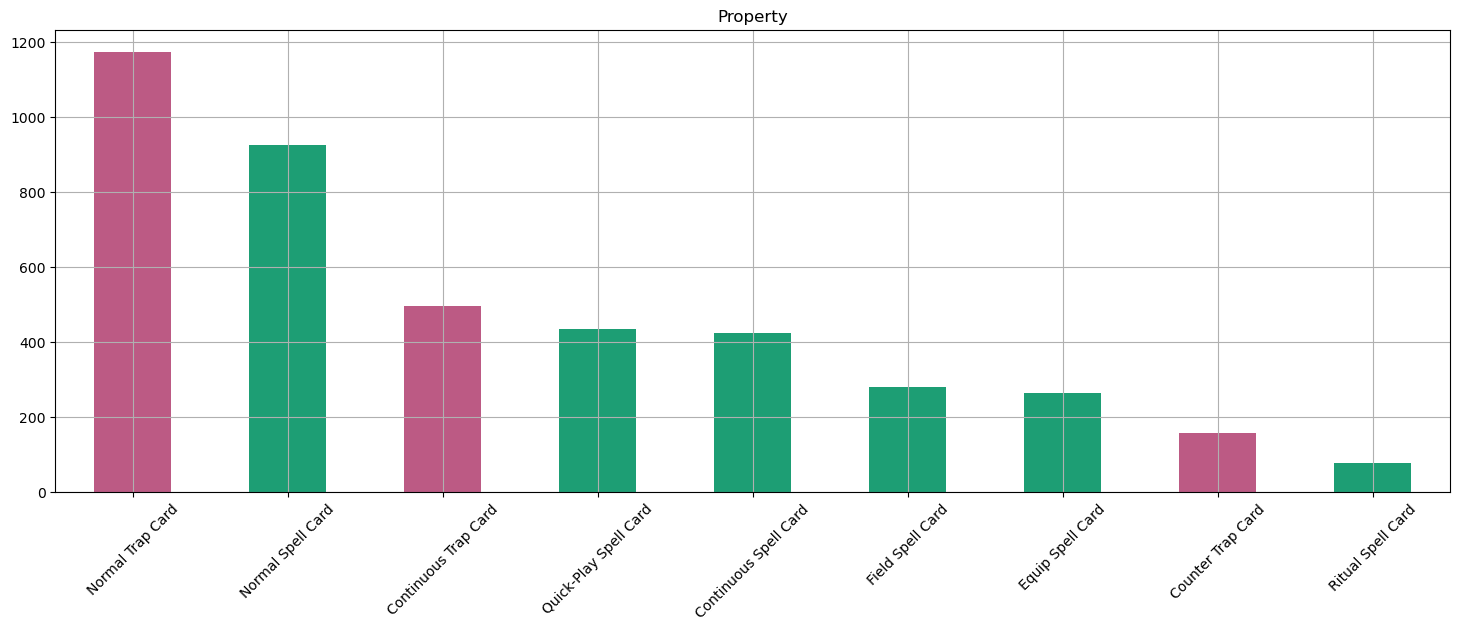

In [70]:
st_colors = [colors_dict[i] for i in cards_df[['Card type','Property']].value_counts().index.get_level_values(0)]
st_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = st_colors, title = 'Property')
plt.show()

### Effect type

In [71]:
print('Total number of effect types:', st_df['Effect type'].explode().nunique())

Total number of effect types:

14

In [72]:
st_df.explode('Effect type').groupby('Effect type').nunique()

Name  Password  Card type  Property  Archseries  \
Effect type                                                               
Activation condition     833       826          2         8         169   
Condition               1705      1687          2         9         379   
Continuous Effect         21        21          2         6          12   
Continuous-like Effect   905       897          2         7         238   
Cost                     451       449          2         7         112   
Effect                  2966      2944          2         9         435   
Ignition Effect            2         2          2         2           2   
Ignition-like Effect     450       445          1         6         186   
Lingering effect          96        96          2         6          43   
Maintenance cost          22        22          2         5           7   
Quick Effect               9         9          2         3           4   
Quick-like Effect        345       340          2         4         150   
Trigger Effect           853       846          2         9         262   
Unclassified effect       86        86          2         9          50   

                        TCG status  OCG status  Page name  Page URL  Artwork  \
Effect type                                                                    
Activation condition             5           5        833       833        2   
Condition                        6           5       1706      1706        2   
Continuous Effect                1           1         21        21        1   
Continuous-like Effect           6           5        906       906        2   
Cost                             5           4        451       451        2   
Effect                           6           6       2967      2967        3   
Ignition Effect                  1           1          2         2        0   
Ignition-like Effect             4           5        450       450        2   
Lingering effect                 4           3         96        96        1   
Maintenance cost                 2           2         22        22        1   
Quick Effect                     1           1          9         9        0   
Quick-like Effect                4           4        345       345        1   
Trigger Effect                   4           5        853       853        1   
Unclassified effect              1           2         86        86        1   

                        Modification date  Errata  
Effect type                                        
Activation condition                  832       4  
Condition                            1692       4  
Continuous Effect                      21       3  
Continuous-like Effect                904       4  
Cost                                  451       4  
Effect                               2954       4  
Ignition Effect                         2       1  
Ignition-like Effect                  447       3  
Lingering effect                       96       3  
Maintenance cost                       22       2  
Quick Effect                            9       2  
Quick-like Effect                     345       2  
Trigger Effect                        846       4  
Unclassified effect                    86       2

#### Spell & Trap discrimination

In [73]:
st_diff = st_df[['Card type', 'Effect type']].explode('Effect type').value_counts().unstack(0).fillna(0).astype(int)
st_diff

Card type               Spell Card  Trap Card
Effect type                                  
Activation condition           244        589
Condition                     1155        551
Continuous Effect                7         14
Continuous-like Effect         621        285
Cost                           240        211
Effect                        1549       1418
Ignition Effect                  1          1
Ignition-like Effect           450          0
Lingering effect                56         40
Maintenance cost                11         11
Quick Effect                     4          5
Quick-like Effect                3        342
Trigger Effect                 575        278
Unclassified effect             64         22

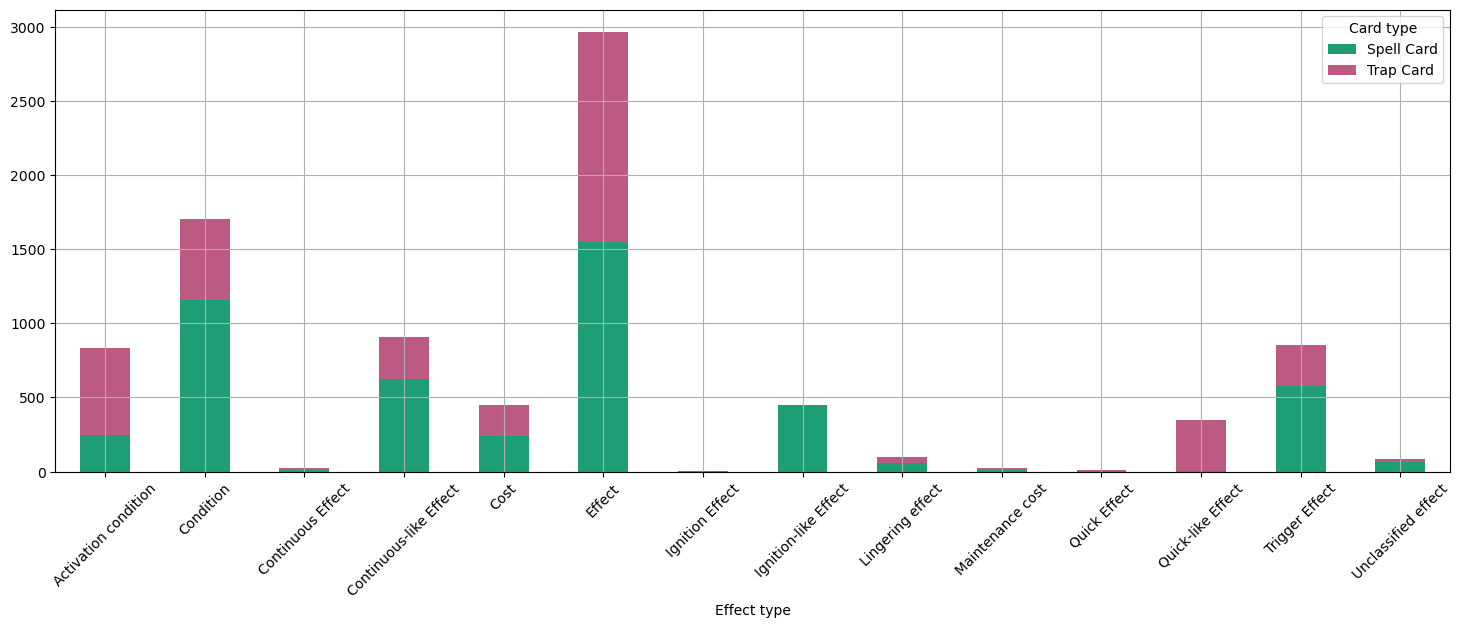

In [74]:
st_diff_colors = {'Spell Card': colors_dict['Spell Card'], 'Trap Card': colors_dict['Trap Card']}
st_diff.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=45, color = st_diff_colors)
plt.show()

## Archseries

In [75]:
exploded_archseries = cards_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

Total number of Archseries:

719

In [76]:
exploded_archseries.groupby('Archseries').nunique()

Name  Password  Card type  Property  Effect type  \
Archseries                                                            
"C"                   9         9          1         0            7   
-Eyes Dragon         73        73          1         0           44   
/Assault Mode         7         7          1         0            5   
@Ignister            18        18          1         0            9   
A-to-Z               16        16          1         0            5   
...                 ...       ...        ...       ...          ...   
sphinx               10        10          2         1            9   
sprout                2         2          1         0            2   
tellarknight         25        25          2         4           12   
with Chain            4         4          1         1            4   
with Eyes of Blue     8         8          2         2            6   

                   TCG status  OCG status  Page name  Page URL  Artwork  \
Archseries                                                                
"C"                         2           1          9         9        0   
-Eyes Dragon                2           2         73        73        1   
/Assault Mode               1           1          7         7        0   
@Ignister                   1           1         18        18        0   
A-to-Z                      1           1         16        16        2   
...                       ...         ...        ...       ...      ...   
sphinx                      1           1         10        10        0   
sprout                      1           1          2         2        0   
tellarknight                1           2         25        25        0   
with Chain                  1           1          4         4        1   
with Eyes of Blue           1           1          8         8        0   

                   Modification date  Errata  Attribute  Primary type  \
Archseries                                                              
"C"                                9       2          1             2   
-Eyes Dragon                      73       4          6             7   
/Assault Mode                      7       1          5             1   
@Ignister                         18       0          6             6   
A-to-Z                            16       3          1             3   
...                              ...     ...        ...           ...   
sphinx                            10       1          2             1   
sprout                             2       0          1             1   
tellarknight                      25       1          2             2   
with Chain                         4       1          0             0   
with Eyes of Blue                  8       2          1             1   

                   Secondary type  Monster type  DEF  Pendulum Scale  Link  \
Archseries                                                                   
"C"                             0             1    8               0     0   
-Eyes Dragon                    2             3   13               6     1   
/Assault Mode                   0             6    6               0     0   
@Ignister                       1             1    9               0     3   
A-to-Z                          1             1   12               0     0   
...                           ...           ...  ...             ...   ...   
sphinx                          0             2    5               0     0   
sprout                          0             1    1               0     0   
tellarknight                    0             4   15               2     0   
with Chain                      0             0    0               0     0   
with Eyes of Blue               1             1    4               0     0   

                   Link Arrows  ATK  Level/Rank  
Archseries                                       
"C"                          0    9           8  
-Eye

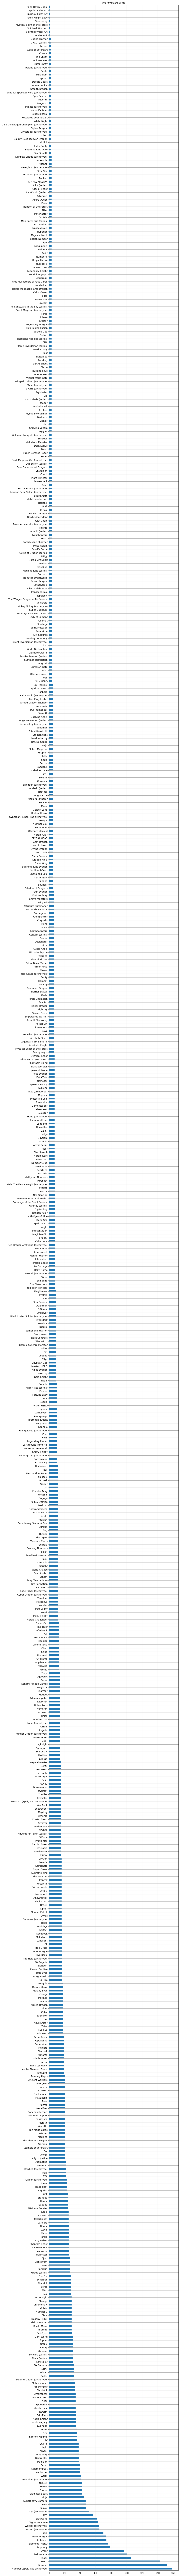

In [77]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,200), grid = True, title = 'Archtypes/Series')
plt.show()

### By card type

In [78]:
archseries_crosstab = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Card type'], margins = True)
archseries_crosstab

Card type          Monster Card  Spell Card  Trap Card   All
Archseries                                                  
"C"                           9           0          0     9
-Eyes Dragon                 73           0          0    73
/Assault Mode                 7           0          0     7
@Ignister                    18           0          0    18
A-to-Z                       16           0          0    16
...                         ...         ...        ...   ...
sprout                        2           0          0     2
tellarknight                 20           5          0    25
with Chain                    0           0          4     4
with Eyes of Blue             5           3          0     8
All                        7354        1383        911  9648

[720 rows x 4 columns]

### By primary type

In [79]:
archseries_crosstab_b = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Primary type'], margins = True)
archseries_crosstab_b

Primary type       Effect Monster  Fusion Monster  Link Monster  \
Archseries                                                        
"C"                             8               0             0   
-Eyes Dragon                   31              11             1   
/Assault Mode                   7               0             0   
@Ignister                      10               1             4   
A-to-Z                          6               8             0   
...                           ...             ...           ...   
sphinx                          9               0             0   
sprout                          2               0             0   
tellarknight                   14               0             0   
with Eyes of Blue               5               0             0   
All                          4729             543           342   

Primary type       Normal Monster  Ritual Monster  Synchro Monster  \
Archseries                                                           
"C"                             1               0                0   
-Eyes Dragon                    3               4                5   
/Assault Mode                   0               0                0   
@Ignister                       0               1                1   
A-to-Z                          2               0                0   
...                           ...             ...              ...   
sphinx                          0               0                0   
sprout                          0               0                0   
tellarknight                    0               0                0   
with Eyes of Blue               0               0                0   
All                           218             127              448   

Primary type       Xyz Monster   All  
Archseries                            
"C"                          0     9  
-Eyes Dragon                18    73  
/Assault Mode                0     7  
@Ignister                    1    18  
A-to-Z                       0    16  
...                        ...   ...  
sphinx                       0     9  
sprout                       0     2  
tellarknight                 6    20  
with Eyes of Blue            0     5  
All                        943  7350  

[655 rows x 8 columns]



### By secondary type

In [80]:
exploded_archseries_secondary_type = exploded_archseries[['Archseries', 'Secondary type']].explode('Secondary type')
archseries_crosstab_c = pd.crosstab(exploded_archseries_secondary_type['Archseries'],exploded_archseries_secondary_type['Secondary type'], margins = True)
archseries_crosstab_c

Secondary type     Flip monster  Gemini monster  Spirit monster  Toon monster  \
Archseries                                                                      
-Eyes Dragon                  0               2               0             2   
@Ignister                     0               0               0             0   
A-to-Z                        0               0               0             0   
Adamancipator                 0               0               0             0   
Alien                         1               1               0             0   
...                         ...             ...             ...           ...   
itsu                          0               0               0             0   
lswarm                        2               0               0             0   
roid                          0               0               0             0   
with Eyes of Blue             0               0               0             0   
All                         128              28              13            36   

Secondary type     Tuner monster  Union monster  All  
Archseries                                            
-Eyes Dragon                   0              0    4  
@Ignister                      1              0    1  
A-to-Z                         0              6    6  
Adamancipator                  3              0    3  
Alien                          1              0    3  
...                          ...            ...  ...  
itsu                           0              2    2  
lswarm                         0              0    2  
roid                           9              0    9  
with Eyes of Blue              5              0    5  
All                          434             18  657  

[202 rows x 7 columns]

### By monster type

In [81]:
archseries_crosstab_d = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Monster type'], margins = True)
archseries_crosstab_d

Monster type       Aqua  Beast  Beast-Warrior  Creator God  Cyberse  Dinosaur  \
Archseries                                                                      
"C"                   0      0              0            0        0         0   
-Eyes Dragon          0      0              0            0        0         0   
/Assault Mode         0      0              0            0        0         0   
@Ignister             0      0              0            0       18         0   
A-to-Z                0      0              0            0        0         0   
...                 ...    ...            ...          ...      ...       ...   
sphinx                0      3              0            0        0         0   
sprout                0      0              0            0        0         0   
tellarknight          0      0              0            0        0         0   
with Eyes of Blue     0      0              0            0        0         0   
All                 194    295            186            2      156        90   

Monster type       Divine-Beast  Dragon  Fairy  Fiend  Fish  Insect  Machine  \
Archseries                                                                     
"C"                           0       0      0      0     0       9        0   
-Eyes Dragon                  0      68      0      0     0       0        2   
/Assault Mode                 0       2      0      0     0       0        1   
@Ignister                     0       0      0      0     0       0        0   
A-to-Z                        0       0      0      0     0       0       16   
...                         ...     ...    ...    ...   ...     ...      ...   
sphinx                        0       0      0      0     0       0        0   
sprout                        0       0      0      0     0       0        0   
tellarknight                  0       0      0      1     0       0        0   
with Eyes of Blue             0       0      0      0     0       0        0   
All                          12     730    455    696    75     163      996   

Monster type       Plant  Psychic  Pyro  Reptile  Rock  Sea Serpent  \
Archseries                                                            
"C"                    0        0     0        0     0            0   
-Eyes Dragon           0        0     0        0     0            0   
/Assault Mode          0        1     0        0     0            0   
@Ignister              0        0     0        0     0            0   
A-to-Z                 0        0     0        0     0            0   
...                  ...      ...   ...      ...   ...          ...   
sphinx                 0        0     0        0     6            0   
sprout                 2        0     0        0     0            0   
tellarknight           0        0     0        0     0            0   
with Eyes of Blue      0        0     0        0     0            0   
All                  183      158    96      137   216           71   

Monster type       Spellcaster  Thunder  Warrior  Winged Beast  Wyrm  Zombie  \
Archseries                                                                     
"C"                          0        0        0             0     0       0   
-Eyes Dragon                 0        0        0             0     0       3   
/Assault Mode                1        0        1             0     0       1   
@Ignister                    0        0        0             0     0       0   
A-to-Z                       0        0        0             0     0       0   
...                        ...      ...      ...           ...   ...     ...   
sphinx                       0        0        0             0     0       0   
sprout                       0        0        0             0     0       0   
tellarknight                 1        0       17             0     1       0   
with Eyes of Blue            5        0        0             0     0       0   
All                  

### By property

In [82]:
archseries_crosstab_e = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Property'], margins = True)
archseries_crosstab_e

Property           Continuous Spell Card  Continuous Trap Card  \
Archseries                                                       
A.I.                                   1                     3   
Abyss Actor                            0                     0   
Abyss Script                           1                     0   
Abyss-                                 0                     1   
Adamancipator                          0                     0   
...                                  ...                   ...   
sphinx                                 0                     1   
tellarknight                           1                     0   
with Chain                             0                     0   
with Eyes of Blue                      1                     0   
All                                  247                   291   

Property           Counter Trap Card  Equip Spell Card  Field Spell Card  \
Archseries                                                                 
A.I.                               0                 0                 1   
Abyss Actor                        0                 0                 0   
Abyss Script                       0                 0                 0   
Abyss-                             0                 3                 0   
Adamancipator                      1                 0                 1   
...                              ...               ...               ...   
sphinx                             0                 0                 0   
tellarknight                       0                 1                 1   
with Chain                         0                 0                 0   
with Eyes of Blue                  0                 0                 0   
All                               75               133               183   

Property           Normal Spell Card  Normal Trap Card  Quick-Play Spell Card  \
Archseries                                                                      
A.I.                               4                 1                      2   
Abyss Actor                        1                 2                      0   
Abyss Script                       5                 0                      1   
Abyss-                             0                 3                      0   
Adamancipator                      2                 1                      0   
...                              ...               ...                    ...   
sphinx                             0                 0                      0   
tellarknight                       0                 0                      2   
with Chain                         0                 4                      0   
with Eyes of Blue                  0                 0                      2   
All                              517               545                    262   

Property           Ritual Spell Card   All  
Archseries                                  
A.I.                               1    13  
Abyss Actor                        0     3  
Abyss Script                       0     7  
Abyss-                             0     7  
Adamancipator                      0     5  
...                              ...   ...  
sphinx                             0     1  
tellarknight                       0     5  
with Chain                         0     4  
with Eyes of Blue                  0     3  
All                               41  2294  

[403 rows x 10 columns]

## Artworks

In [83]:
print('Total number of cards with edited or alternate artworks:', cards_df['Artwork'].count())

Total number of cards with edited or alternate artworks:

631

In [84]:
cards_df[['Name','Password','TCG status','OCG status','Artwork']][cards_df['Artwork'].notna()]

Name  Password TCG status OCG status    Artwork
16           A Deal with Dark Ruler  06850209  Unlimited  Unlimited  (Edited,)
29      A-to-Z-Dragon Buster Cannon  65172015  Unlimited  Unlimited  (Edited,)
48                     Absolute End  27744077  Unlimited  Unlimited  (Edited,)
52       Absorbing Kid from the Sky  49771608  Unlimited  Unlimited  (Edited,)
62     Abyss Actor - Mellow Madonna  78310590  Unlimited  Unlimited  (Edited,)
...                             ...       ...        ...        ...        ...
12122         Yorishiro of the Aqua  57511992  Unlimited  Unlimited  (Edited,)
12236                       Zombino  14575467  Unlimited  Unlimited  (Edited,)
12238              Zombyra the Dark  88472456  Unlimited  Unlimited  (Edited,)
12240               Zoodiac Barrage  46060017  Forbidden    Limited  (Edited,)
12243            Zoodiac Bunnyblast  04367330  Unlimited  Unlimited  (Edited,)

[631 rows x 5 columns]

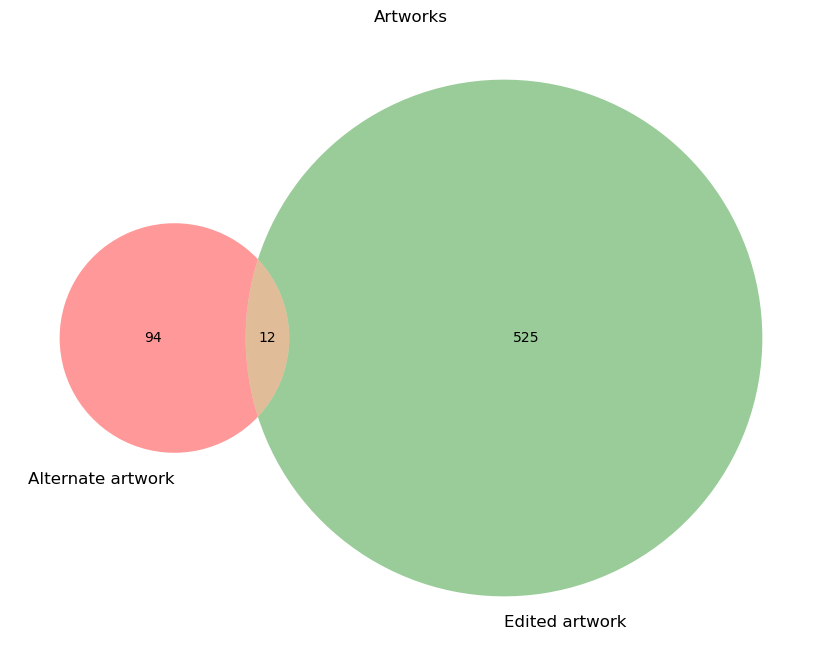

In [85]:
artwork_value_counts = cards_df['Artwork'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Artworks')
venn2(subsets = (artwork_value_counts[('Alternate',)], artwork_value_counts[('Edited',)],artwork_value_counts[('Alternate','Edited')]), set_labels = ('Alternate artwork', 'Edited artwork'))
plt.show()

### By card type

In [86]:
artwork_crosstab = pd.crosstab(cards_df['Artwork'], cards_df['Card type'])
artwork_crosstab

Card type            Monster Card  Spell Card  Trap Card
Artwork                                                 
(Alternate,)                   82           7          5
(Alternate, Edited)            11           1          0
(Edited,)                     296         119        110

### By primary type

In [87]:
artwork_crosstab_b = pd.crosstab(cards_df['Artwork'], cards_df['Primary type'])
artwork_crosstab_b

Primary type         Effect Monster  Fusion Monster  Link Monster  \
Artwork                                                             
(Alternate,)                     36              13             9   
(Alternate, Edited)               3               1             5   
(Edited,)                       193              22            10   

Primary type         Normal Monster  Ritual Monster  Synchro Monster  \
Artwork                                                                
(Alternate,)                     16               0                3   
(Alternate, Edited)               2               0                0   
(Edited,)                        43               7                5   

Primary type         Xyz Monster  
Artwork                           
(Alternate,)                   5  
(Alternate, Edited)            0  
(Edited,)                     16

More granularity is unnecessary

## Errata

In [88]:
print('Total number of cards with errata:', cards_df['Errata'].count())

Total number of cards with errata:

4858

In [89]:
cards_df[['Name','Password','TCG status','OCG status','Errata']][cards_df['Errata'].notna()]

Name  Password TCG status OCG status   Errata
0          "A" Cell Breeding Device  34541863  Unlimited  Unlimited  (Name,)
4      "Infernoble Arms - Durendal"  37478723  Unlimited  Unlimited   (Any,)
8                    3-Hump Lacooda  86988864  Unlimited  Unlimited   (Any,)
10        4-Starred Ladybug of Doom  83994646  Unlimited  Unlimited   (Any,)
13                      7 Completed  86198326  Unlimited  Unlimited  (Type,)
...                             ...       ...        ...        ...      ...
12254              Zoodiac Whiptail  31755044  Unlimited  Unlimited   (Any,)
12257                 Zubaba Buster  57036718  Unlimited  Unlimited   (Any,)
12259                 Zubaba Knight  97896503  Unlimited  Unlimited   (Any,)
12262    Zure, Knight of Dark World  07459013  Unlimited  Unlimited  (Type,)
12263     Zushin the Sleeping Giant  67547370  Unlimited  Unlimited   (Any,)

[4858 rows x 5 columns]

In [90]:
errata_counts = cards_df.groupby('Errata').nunique().sort_values('Name',ascending=False)
errata_counts

Name  Password  Card type  Property  Archseries  Effect type  \
Errata                                                                       
(Any,)        3590      3585          3         9         617          220   
(Type,)        744       744          3         9         180           83   
(Name,)        395       395          3         9         132           76   
(Name, Type)   121       120          3         6          58           38   

              TCG status  OCG status  Page name  Page URL  Artwork  \
Errata                                                               
(Any,)                 5           5       3592      3592        3   
(Type,)                4           5        746       746        3   
(Name,)                4           3        395       395        2   
(Name, Type)           4           4        125       125        3   

              Modification date  Attribute  Primary type  Secondary type  \
Errata                                                                     
(Any,)                     3578          7             7               8   
(Type,)                     745          7             7               6   
(Name,)                     395          6             7               3   
(Name, Type)                125          7             6               5   

              Monster type  DEF  Pendulum Scale  Link  Link Arrows  ATK  \
Errata                                                                    
(Any,)                  24   59               9     4           10   70   
(Type,)                 24   44               5     2            2   54   
(Name,)                 22   37               4     1            1   42   
(Name, Type)            16   29               0     0            0   35   

              Level/Rank  
Errata                    
(Any,)                13  
(Type,)               12  
(Name,)               11  
(Name, Type)          10

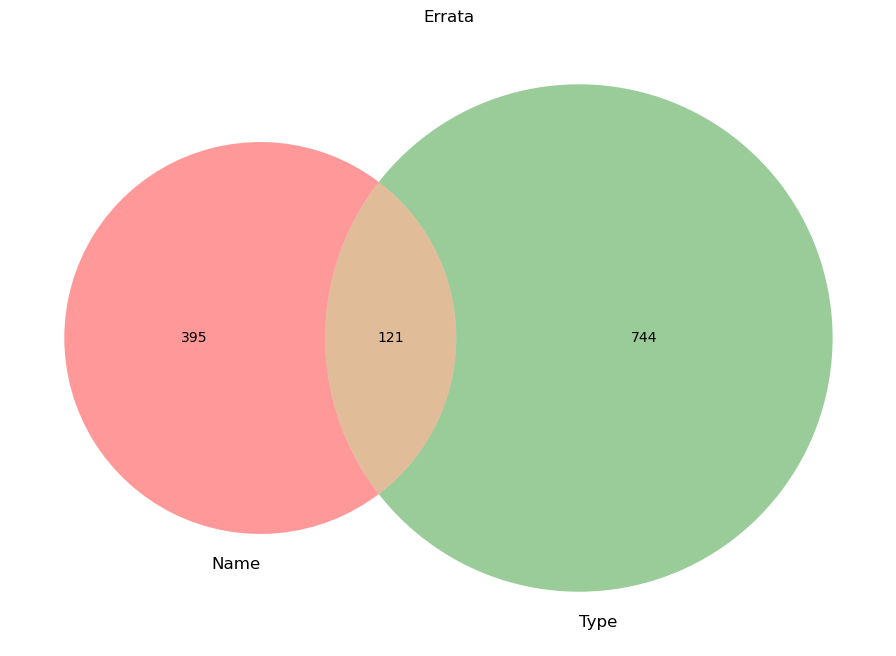

In [91]:
plt.figure(figsize=(20,8))
plt.title('Errata')
sorted_errata_name_counts=errata_counts['Name'].drop(('Any',)).sort_index(key=lambda x: [(len(i),i) for i in x])
venn2(subsets = sorted_errata_name_counts, set_labels=sorted_errata_name_counts.index[:-1].str[0])
plt.show()

### By card type

In [92]:
errata_crosstab = pd.crosstab(cards_df['Errata'], cards_df['Card type'])
errata_crosstab.sort_values(by=errata_crosstab.columns.tolist(),ascending=False)

Card type     Monster Card  Spell Card  Trap Card
Errata                                           
(Any,)                2254         688        650
(Type,)                522         214         10
(Name,)                283          60         52
(Name, Type)           102          21          2

### By primary type

In [93]:
errata_crosstab_b = pd.crosstab(cards_df['Errata'], cards_df['Primary type'])
errata_crosstab_b.sort_values(by=errata_crosstab_b.columns.tolist(),ascending=False)

Primary type  Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Errata                                                                       
(Any,)                  1696             133            15              60   
(Type,)                  334              28             2             109   
(Name,)                  190              46             4              25   
(Name, Type)              46              10             0              35   

Primary type  Ritual Monster  Synchro Monster  Xyz Monster  
Errata                                                      
(Any,)                    38              139          173  
(Type,)                    2               29           17  
(Name,)                    2                9            7  
(Name, Type)               3                5            1

More granularity is unnecessary

### By artwork

In [94]:
errata_crosstab_c = pd.crosstab(cards_df['Artwork'], cards_df['Errata'])
errata_crosstab_c.sort_values(by=errata_crosstab_c.columns.tolist(),ascending=False)

Errata               (Any,)  (Name,)  (Name, Type)  (Type,)
Artwork                                                    
(Edited,)               182       22            17       62
(Alternate,)             32        4            20       24
(Alternate, Edited)       1        0             3        2

## TCG & OCG status

### TGC status

In [95]:
print('Total number of TCG status:', cards_df['TCG status'].nunique())

Total number of TCG status:

6

In [96]:
cards_df.drop(columns=['Page name', 'Page URL']).groupby('TCG status', dropna=False).nunique()

Name  Password  Card type  Property  Archseries  \
TCG status                                                           
Forbidden           104       104          3         7          58   
Illegal              38         0          3         3           6   
Limited              80        80          3         5          41   
Not yet released     29        29          3         7          16   
Semi-Limited          5         5          3         3           5   
Unlimited         11627     11624          3         9        1156   
NaN                 379       324          3         9          93   

                  Effect type  OCG status  Artwork  Modification date  Errata  \
TCG status                                                                      
Forbidden                  49           4        1                104       4   
Illegal                     6           1        0                 38       3   
Limited                    37           4        3                 80       4   
Not yet released           21           1        0                 27       0   
Semi-Limited                5           2        0                  5       2   
Unlimited                 353           5        3              11520       4   
NaN                        76           3        0                379       2   

                  Attribute  Primary type  Secondary type  Monster type  DEF  \
TCG status                                                                     
Forbidden                 6             5               2            19   21   
Illegal                   6             5               0            14   12   
Limited                   6             6               2            15   18   
Not yet released          4             6               1             6    8   
Semi-Limited              2             2               0             2    2   
Unlimited                 7             7               8            24   75   
NaN                       7             7               3            24   41   

                  Pendulum Scale  Link  Link Arrows  ATK  Level/Rank  
TCG status                                                            
Forbidden                      2     4           10   27          12  
Illegal                        2     2            2   11           5  
Limited                        2     1            1   23           9  
Not yet released               1     2            2    6           5  
Semi-Limited                   0     0            0    2           2  
Unlimited                     13     6           60   80          14  
NaN                            7     4            5   54          11

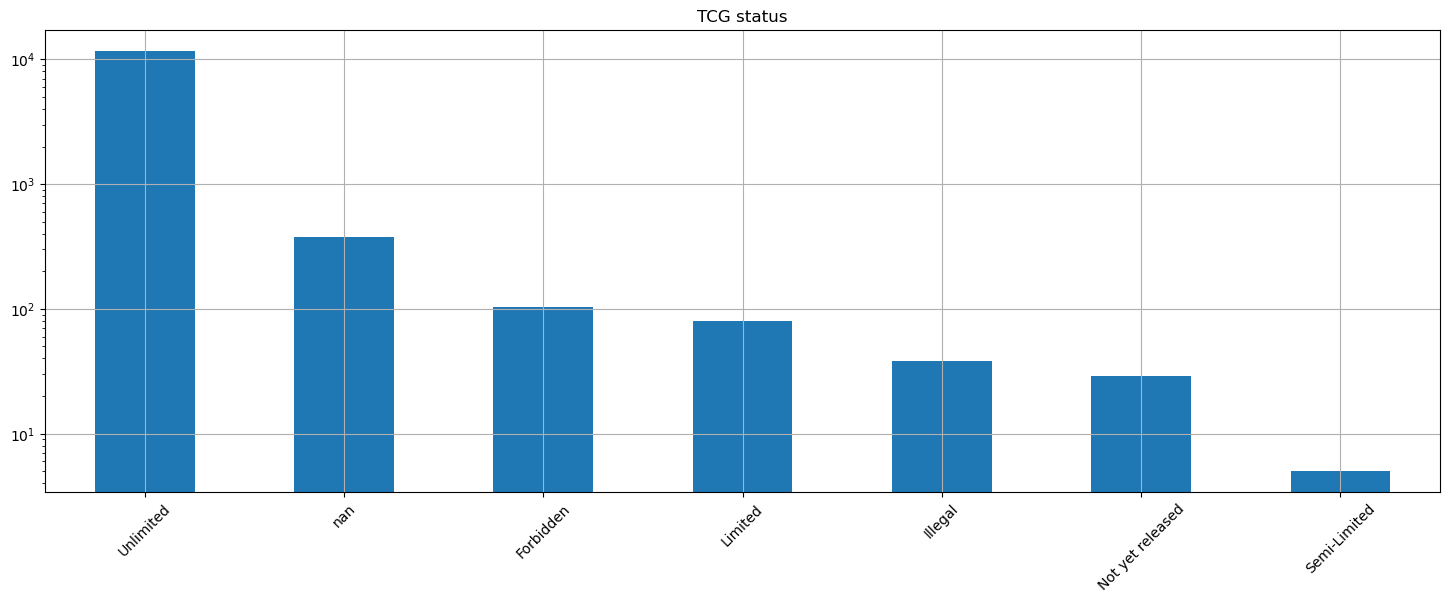

In [97]:
cards_df['TCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [98]:
# Remove unlimited
tcg_crosstab = pd.crosstab(cards_df['Card type'], cards_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab

TCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Card type                                                                
Monster Card         68       35       45                12             2
Spell Card           26        2       33                12             2
Trap Card            10        1        2                 5             1

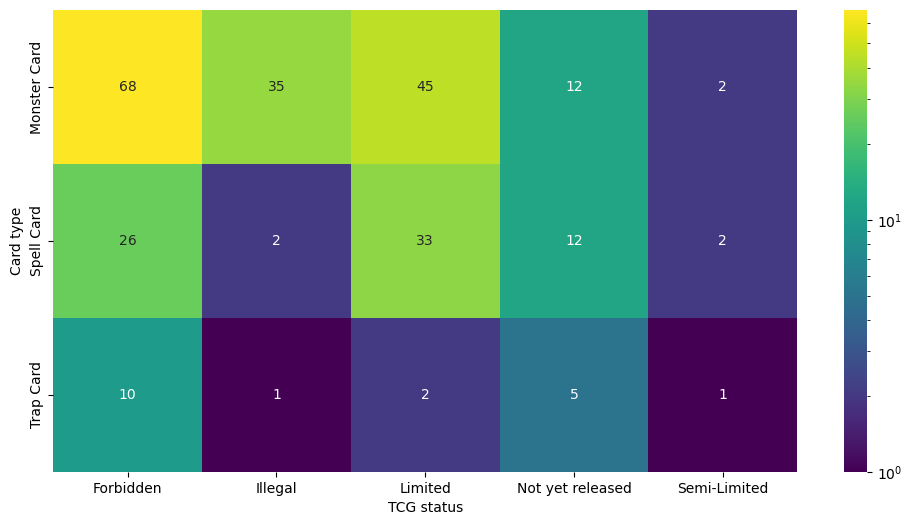

In [99]:
plt.figure(figsize = (12,6))
sns.heatmap(tcg_crosstab[tcg_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=mc.LogNorm())
plt.show()

#### By monster type

In [100]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(cards_df['Monster type'], cards_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab_b

TCG status     Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Monster type                                                              
Aqua                   2        0        4                 0             0
Beast                  0        3        2                 0             0
Beast-Warrior          2        3        2                 0             0
Cyberse                2        0        1                 1             0
Dinosaur               0        0        2                 0             0
Divine-Beast           0        3        0                 0             0
Dragon                11        3        6                 2             0
Fairy                  4        4        6                 0             0
Fiend                  5        2        2                 0             0
Fish                   1        0        0                 0             0
Insect                 2        0        0                 2             0
Machine                6        4        4                 0             0
Plant                  6        1        0                 2             0
Psychic                2        1        1                 0             0
Pyro                   0        0        0                 0             0
Reptile                1        0        1                 0             0
Rock                   2        1        4                 0             0
Sea Serpent            1        0        0                 0             0
Spellcaster            8        5        7                 1             0
Thunder                2        1        0                 0             0
Warrior                4        2        2                 4             1
Winged Beast           3        2        1                 0             1
Wyrm                   4        0        0                 0             0
Zombie                 0        0        0                 0             0

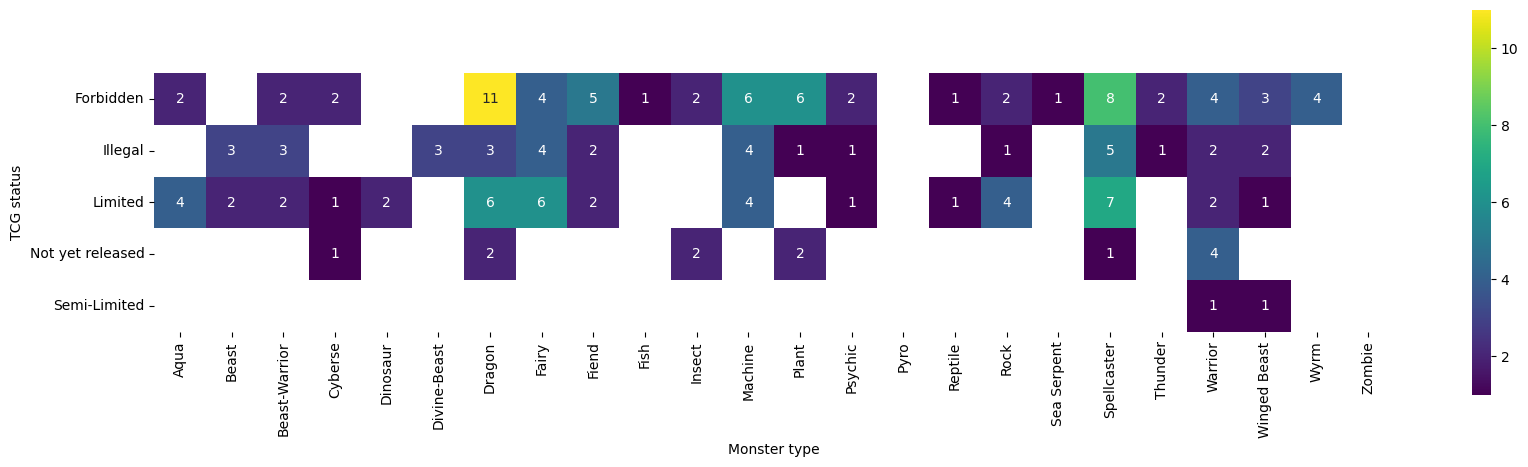

In [101]:
plt.figure(figsize = (20,5))
sns.heatmap(tcg_crosstab_b[tcg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [102]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['TCG status'], margins = True)
tcg_crosstab_c

TCG status                 Forbidden  Illegal  Limited  Semi-Limited  \
Archseries                                                             
-Eyes Dragon                       1        0        0             0   
Adventurer Token (series)          0        0        0             0   
Amazoness                          0        0        0             0   
Attribute Knight                   0        0        1             0   
Barrier Statue                     1        0        0             0   
...                              ...      ...      ...           ...   
Zexal                              1        0        0             0   
Zoodiac                            3        0        1             0   
roid                               0        0        1             0   
tellarknight                       0        0        0             0   
All                               64       39       37             4   

TCG status                 Unlimited  All  
Archseries                                 
-Eyes Dragon                       0    1  
Adventurer Token (series)          2    2  
Amazoness                          1    1  
Attribute Knight                   0    1  
Barrier Statue                     0    1  
...                              ...  ...  
Zexal                              0    1  
Zoodiac                            0    4  
roid                               0    1  
tellarknight                       1    1  
All                               72  216  

[111 rows x 6 columns]

### OCG status

In [103]:
print('Total number of OCG status:', cards_df['OCG status'].nunique())

Total number of OCG status:

6

In [104]:
cards_df.drop(columns=['Page name', 'Page URL']).groupby('OCG status', dropna=False).nunique()

Name  Password  Card type  Property  Archseries  \
OCG status                                                           
Forbidden            87        87          3         6          45   
Illegal              32         1          3         2           8   
Limited              76        76          3         6          43   
Not yet released     27         1          3         6           8   
Semi-Limited         23        23          2         4          14   
Unlimited         11964     11937          3         9        1171   
NaN                  49        37          3         6           6   

                  Effect type  TCG status  Artwork  Modification date  Errata  \
OCG status                                                                      
Forbidden                  40           3        1                 87       4   
Illegal                     8           1        0                 32       3   
Limited                    34           3        3                 76       3   
Not yet released           15           1        0                 27       0   
Semi-Limited               17           4        2                 23       3   
Unlimited                 356           5        3              11861       4   
NaN                        17           2        0                 49       2   

                  Attribute  Primary type  Secondary type  Monster type  DEF  \
OCG status                                                                     
Forbidden                 6             5               3            19   21   
Illegal                   6             6               1            12   15   
Limited                   6             6               2            15   21   
Not yet released          6             7               1             6   11   
Semi-Limited              4             2               1             6    6   
Unlimited                 7             7               8            25   76   
NaN                       6             5               1            15   15   

                  Pendulum Scale  Link  Link Arrows  ATK  Level/Rank  
OCG status                                                            
Forbidden                      3     4            8   24          11  
Illegal                        2     2            2   14           8  
Limited                        3     3            3   21           9  
Not yet released               0     1            1   16           8  
Semi-Limited                   0     2            2    8           4  
Unlimited                     13     6           60   81          14  
NaN                            0     1            2   14           6

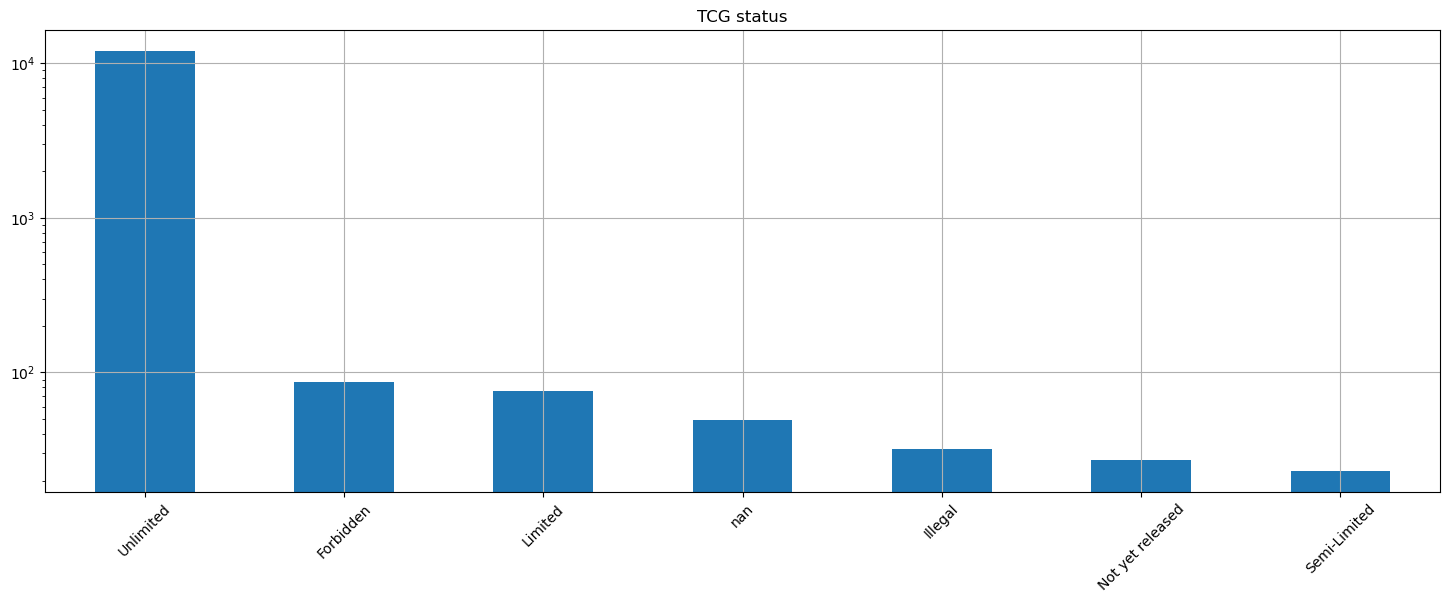

In [105]:
cards_df['OCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [106]:
# Remove unlimited
ocg_crosstab = pd.crosstab(cards_df['Card type'], cards_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab

OCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Card type                                                                
Monster Card         56       30       44                18             8
Spell Card           21        1       29                 6            15
Trap Card            10        1        3                 3             0

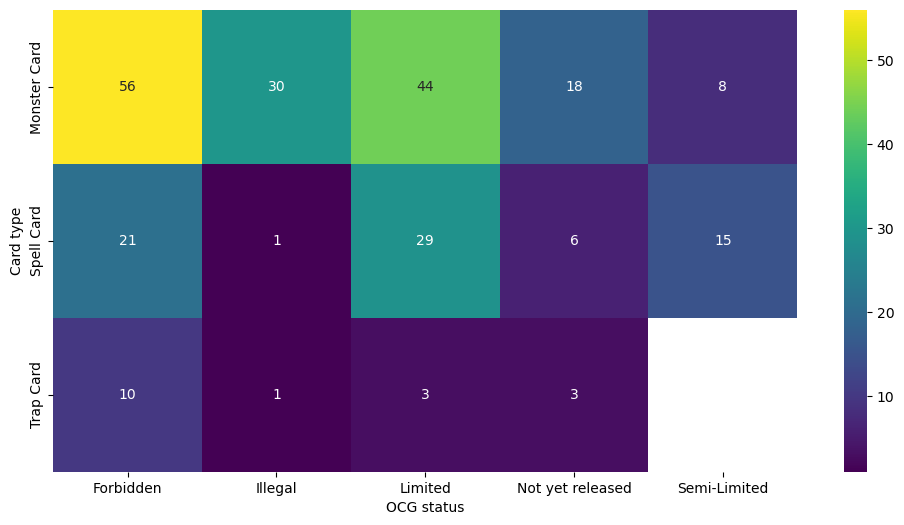

In [107]:
plt.figure(figsize = (12,6))
sns.heatmap(ocg_crosstab[ocg_crosstab>0], annot=True, fmt="g", cmap='viridis')
plt.show()

#### By monster type

In [108]:
ocg_crosstab_b = pd.crosstab(cards_df['Monster type'], cards_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab_b

OCG status     Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Monster type                                                              
Aqua                   3        0        1                 0             2
Beast                  1        2        0                 0             0
Beast-Warrior          3        2        1                 3             1
Creator God            0        0        0                 0             0
Cyberse                2        0        1                 1             0
Dinosaur               0        0        1                 5             0
Divine-Beast           0        3        0                 0             0
Dragon                 9        3        6                 3             0
Fairy                  2        3        4                 0             0
Fiend                  5        1        0                 0             1
Fish                   1        0        0                 0             0
Insect                 1        0        0                 0             0
Machine                5        3        6                 2             2
Plant                  5        0        1                 0             0
Psychic                1        1        5                 0             0
Pyro                   0        0        1                 0             0
Reptile                1        0        0                 0             0
Rock                   1        1        2                 0             0
Sea Serpent            1        0        0                 0             0
Spellcaster            7        7        8                 0             1
Thunder                0        0        3                 0             0
Warrior                3        3        3                 4             1
Winged Beast           3        1        1                 0             0
Wyrm                   2        0        0                 0             0
Zombie                 0        0        0                 0             0

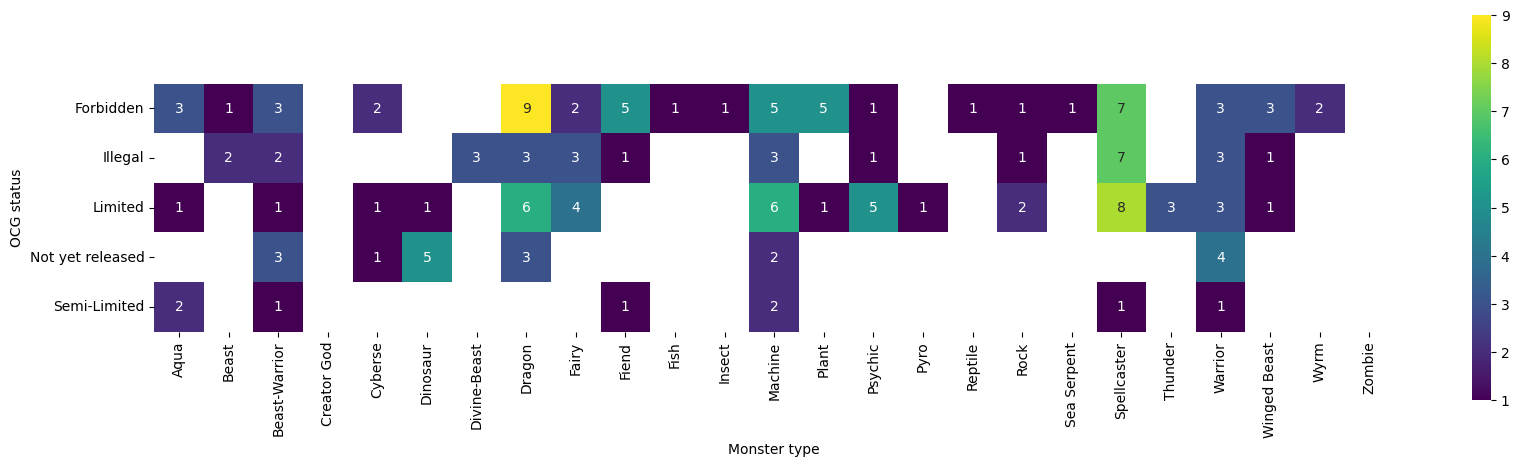

In [109]:
plt.figure(figsize = (20,5))
sns.heatmap(ocg_crosstab_b[ocg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [110]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['OCG status'], margins = True)
ocg_crosstab_c

OCG status                 Forbidden  Illegal  Limited  Not yet released  \
Archseries                                                                 
-Eyes Dragon                       1        0        0                 0   
Adventurer Token (series)          1        0        0                 0   
Amazoness                          1        0        0                 0   
Attribute Knight                   0        0        1                 0   
Barrier Statue                     1        0        0                 0   
...                              ...      ...      ...               ...   
Zexal                              1        0        0                 0   
Zoodiac                            2        0        2                 0   
roid                               0        0        1                 0   
tellarknight                       0        0        1                 0   
All                               72       33       65                25   

OCG status                 Semi-Limited  All  
Archseries                                    
-Eyes Dragon                          0    1  
Adventurer Token (series)             1    2  
Amazoness                             0    1  
Attribute Knight                      0    1  
Barrier Statue                        0    1  
...                                 ...  ...  
Zexal                                 0    1  
Zoodiac                               0    4  
roid                                  0    1  
tellarknight                          0    1  
All                                  17  212  

[117 rows x 6 columns]

### TCG vs. OCG status

In [111]:
cg_crosstab = pd.crosstab(cards_df['OCG status'],cards_df['TCG status'], dropna=False, margins = False)
cg_crosstab

TCG status        Forbidden  Illegal  Limited  Not yet released  Semi-Limited  \
OCG status                                                                      
Forbidden                72        0        4                 0             0   
Illegal                   0       26        0                 0             0   
Limited                   8        0       40                 0             0   
Not yet released          0        0        0                 0             0   
Semi-Limited              1        0        4                 0             3   
Unlimited                23        0       32                29             2   

TCG status        Unlimited  
OCG status                   
Forbidden                11  
Illegal                   0  
Limited                  28  
Not yet released          1  
Semi-Limited             15  
Unlimited             11537

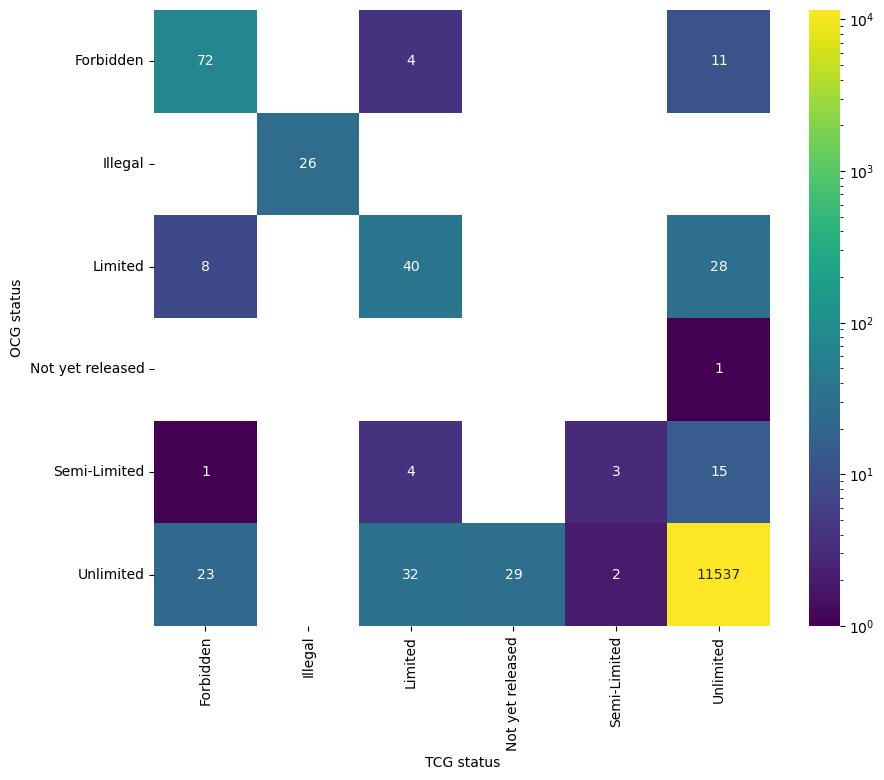

In [112]:
plt.figure(figsize = (10,8))
sns.heatmap(cg_crosstab[cg_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

# Extras

## Multiple secondary types

In [113]:
cards_df.dropna(subset='Secondary type', axis=0)[[len(x)>1 for x in cards_df['Secondary type'].dropna()]]

Name  Password     Card type Property  \
9232                   Scapeghost  67284107  Monster Card      NaN   
9397               Shaddoll Falco  37445295  Monster Card      NaN   
11012            Torque Tune Gear  79538761  Monster Card      NaN   
11220  Turbo-Tainted Hot Rod GT19  16769305  Monster Card      NaN   

                  Archseries  \
9232   (Zombie counterpart,)   
9397             (Shaddoll,)   
11012                    NaN   
11220                    NaN   

                                             Effect type TCG status  \
9232                                      (Flip effect,)  Unlimited   
9397            (Condition, Flip effect, Trigger Effect)  Unlimited   
11012  (Continuous-like Effect, Ignition Effect, Igni...  Unlimited   
11220          (Condition, Quick Effect, Trigger Effect)  Unlimited   

      OCG status                   Page name  \
9232   Unlimited                  Scapeghost   
9397   Unlimited              Shaddoll Falco   
11012  Unlimited            Torque Tune Gear   
11220  Unlimited  Turbo-Tainted Hot Rod GT19   

                                                Page URL Artwork  \
9232               https://yugipedia.com/wiki/Scapeghost     NaN   
9397           https://yugipedia.com/wiki/Shaddoll_Falco     NaN   
11012        https://yugipedia.com/wiki/Torque_Tune_Gear     NaN   
11220  https://yugipedia.com/wiki/Turbo-Tainted_Hot_R...     NaN   

        Modification date  Errata Attribute    Primary type  \
9232  2021-11-01 01:07:12  (Any,)      DARK  Effect Monster   
9397  2021-05-16 16:34:34  (Any,)      DARK  Effect Monster   
11012 2022-07-24 09:51:16  (Any,)     LIGHT  Effect Monster   
11220 2023-01-26 17:36:07     NaN      FIRE  Effect Monster   

                       Secondary type Monster type   DEF Pendulum Scale Link  \
9232    (Flip monster, Tuner monster)       Zombie     0            NaN  NaN   
9397    (Flip monster, Tuner monster)  Spellcaster  1400            NaN  NaN   
11012  (Tuner monster, Union monster)      Machine     0            NaN  NaN   
11220   (Flip monster, Tuner monster)      Machine  1500            NaN  NaN   

      Link Arrows  ATK Level/Rank  
9232          NaN    0          1  
9397          NaN  600          2  
11012         NaN    0          1  
11220         NaN  500          3

## Not yet released

In [114]:
cards_df.loc[cards_df['OCG status'] == 'Not yet released'].loc[full_df['TCG status'] == 'Not yet released']

Empty DataFrame
Columns: [Name, Password, Card type, Property, Archseries, Effect type, TCG status, OCG status, Page name, Page URL, Artwork, Modification date, Errata, Attribute, Primary type, Secondary type, Monster type, DEF, Pendulum Scale, Link, Link Arrows, ATK, Level/Rank]
Index: []

## Counters and Tokens

In [115]:
counter_df.dropna(how='all',axis=1)

Name Card type TCG status  \
0                                Albaz the Shrouded   Counter      Legal   
1                               Aluber the Dogmatic   Counter      Legal   
2                             Black Feather Counter   Counter      Legal   
3                                           Counter   Counter        NaN   
4                               Ecclesia the Exiled   Counter      Legal   
5                                     Emperor's Key   Counter        NaN   
6   Jesse Anderson - Bonder with the Crystal Beasts   Counter      Legal   
7            Jesse and Ruby - Unleashing the Legend   Counter      Legal   
8                                  Predator Counter   Counter        NaN   
9                                     Spell Counter   Counter        NaN   
10                                      Tri-Brigade   Counter      Legal   
11                             The Virtuous Vestals   Counter      Legal   
12                                    Wedge Counter   Counter        NaN   

   OCG status                                        Page name  \
0       Legal                               Albaz the Shrouded   
1       Legal                              Aluber the Dogmatic   
2       Legal                     Black Feather Counter (card)   
3       Legal                                   Counter (card)   
4       Legal                              Ecclesia the Exiled   
5       Legal                             Emperor's Key (card)   
6       Legal  Jesse Anderson - Bonder with the Crystal Beasts   
7       Legal           Jesse and Ruby - Unleashing the Legend   
8       Legal                          Predator Counter (card)   
9       Legal                             Spell Counter (card)   
10      Legal                               Tri-Brigade (card)   
11      Legal                             The Virtuous Vestals   
12      Legal                             Wedge Counter (card)   

                                             Page URL   Modification date  
0       https://yugipedia.com/wiki/Albaz_the_Shrouded 2022-04-16 11:51:55  
1      https://yugipedia.com/wiki/Aluber_the_Dogmatic 2022-07-04 09:51:18  
2   https://yugipedia.com/wiki/Black_Feather_Count... 2023-02-07 09:48:14  
3           https://yugipedia.com/wiki/Counter_(card) 2022-05-26 09:47:12  
4      https://yugipedia.com/wiki/Ecclesia_the_Exiled 2022-04-16 11:51:54  
5   https://yugipedia.com/wiki/Emperor%27s_Key_(card) 2023-02-13 00:23:57  
6   https://yugipedia.com/wiki/Jesse_Anderson_-_Bo... 2022-12-01 15:20:27  
7   https://yugipedia.com/wiki/Jesse_and_Ruby_-_Un... 2022-12-01 15:20:15  
8   https://yugipedia.com/wiki/Predator_Counter_(c... 2023-02-09 14:31:21  
9     https://yugipedia.com/wiki/Spell_Counter_(card) 2023-01-03 20:39:28  
10      https://yugipedia.com/wiki/Tri-Brigade_(card) 2022-04-16 11:51:53  
11    https://yugipedia.com/wiki/The_Virtuous_Vestals 2023-01-31 14:29:47  
12    https://yugipedia.com/wiki/Wedge_Counter_(card) 2019-12-08 00:39:31

# Page name differs from card name

In [116]:
full_df[full_df['Name']!=full_df['Page name']]

Name  Password     Card type  \
377                                  Ancient Gear  31557782  Monster Card   
1030                        Black Feather Counter       NaN       Counter   
1038                         Black Luster Soldier       NaN  Monster Card   
1433                                 Burning Soul  10723472    Spell Card   
1920                                      Counter       NaN       Counter   
...                                           ...       ...           ...   
11452                                   Tyhone #2  56789759  Monster Card   
11953                               Wedge Counter       NaN       Counter   
12058  Winged Dragon, Guardian of the Fortress #1  87796900  Monster Card   
12059  Winged Dragon, Guardian of the Fortress #2  57405307  Monster Card   
12399                               Zera the Mant       NaN  Monster Card   

                    Property                                 Archseries  \
377                      NaN                            (Ancient Gear,)   
1030                     NaN                                        NaN   
1038                     NaN  (Black Luster Soldier (archetype), Chaos)   
1433   Quick-Play Spell Card                                        NaN   
1920                     NaN                                        NaN   
...                      ...                                        ...   
11452                    NaN                                        NaN   
11953                    NaN                                        NaN   
12058                    NaN                                        NaN   
12059                    NaN                                        NaN   
12399                    NaN                                    (Zera,)   

                                             Effect type TCG status  \
377                               (Unclassified effect,)  Unlimited   
1030                                                 NaN      Legal   
1038                                                 NaN        NaN   
1433   (Activation condition, Condition, Effect, Ling...  Unlimited   
1920                                                 NaN        NaN   
...                                                  ...        ...   
11452                                                NaN  Unlimited   
11953                                                NaN        NaN   
12058                                                NaN  Unlimited   
12059                                                NaN  Unlimited   
12399                                                NaN        NaN   

      OCG status                                  Page name  \
377    Unlimited                        Ancient Gear (card)   
1030       Legal               Black Feather Counter (card)   
1038   Unlimited              Black Luster Soldier (Normal)   
1433   Unlimited                        Burning Soul (card)   
1920       Legal                             Counter (card)   
...          ...                                        ...   
11452  Unlimited                                   Tyhone 2   
11953      Legal                       Wedge Counter (card)   
12058  Unlimited  Winged Dragon, Guardian of the Fortress 1   
12059  Unlimited  Winged Dragon, Guardian of the Fortress 2   
12399  Unlimited                     Zera the Mant (Normal)   

                                                Page URL Artwork  \
377       https://yugipedia.com/wiki/Ancient_Gear_(card)     NaN   
1030   https://yugipedia.com/wiki/Black_Feather_Count...     NaN   
1038   https://yugipedia.com/wiki/Black_Luster_Soldie...     NaN   
1433      https://yugipedia.com/wiki/Burning_Soul_(card)     NaN   
1920           https://yugipedia.com/wiki/Counter_(card)     NaN   
...                                                  ...     ...   
11452                https://yugipedia.com/wiki/Tyhone_2     NaN   
11953    https://yugipedia.com/wiki/Wedge_Counter_(card)     NaN 

# Epilogue

In [117]:
benchmark('cards',timestamp)

In [118]:
footer(timestamp)

<div align='right'>
    Execution completed 22/02/2023 22:27 UTC
</div>

## HTML export

In [119]:
# Save notebook on disck before generating HTML report
save_notebook()

Notebook saved to disk

In [120]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Cards.ipynb to HTML


[NbConvertApp] Writing 4453231 bytes to ../Cards.html


## Git

In [ ]:
! git add "../*[Cc]ards*"

In [ ]:
! git commit -m {"'Cards update-" + timestamp.isoformat() + "'"}